<div style="text-align:center">
  <h1>ĐỒ ÁN TỐT NGHIỆP</h1>
</div>

---

Thông tin sinh viên:
1. Mã sinh viên: 2121050118
2. Họ và tên sinh viên: Nguyễn Văn Dũng
3. Ngày sinh: 14/09/2003
4. Lớp: DCCTCT66_07E
5. Giáo viên hướng dẫn:


---

<div style="text-align:center">
  <h2>ĐỀ TÀI PHÂN CỤM CÁC TỈNH DỰA TRÊN MÔ HÌNH THỜI TIẾT</h2>
</div>

In [2]:
#gọi các thư viện:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#------------------------------
import warnings
warnings.filterwarnings('ignore')

# Đọc tập dữ liệu

In [3]:
# Đường dẫn tới thư mục chứa các file CSV (thay bằng đường dẫn thật của bạn nếu khác)
path = "Data/"

# Tìm tất cả các file có dạng weather-vn-*.csv
all_files = glob.glob(path + "weather-vn-*.csv")

# Đọc và gộp tất cả các file CSV
data_list = []
for file in all_files:
    df = pd.read_csv(file)
    data_list.append(df)

# Gộp tất cả DataFrame lại thành 1
data = pd.concat(data_list, ignore_index=True) # 30/6/2025 - 3/11/2025

# Kiểm tra thông tin dữ liệu sau khi gộp
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815246 entries, 0 to 3815245
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   time                 object 
 1   province             object 
 2   city                 object 
 3   temperature          float64
 4   temp_min             float64
 5   temp_max             float64
 6   humidity             float64
 7   feels_like           float64
 8   visibility           float64
 9   precipitation        float64
 10  cloudcover           float64
 11  wind_speed           float64
 12  wind_gust            float64
 13  wind_direction       float64
 14  pressure             float64
 15  is_day               int64  
 16  weather_code         int64  
 17  weather_main         object 
 18  weather_description  object 
 19  weather_icon         object 
dtypes: float64(12), int64(2), object(6)
memory usage: 582.2+ MB


In [4]:
data.head()

,time,province,city,temperature,temp_min,temp_max,humidity,feels_like,visibility,precipitation,cloudcover,wind_speed,wind_gust,wind_direction,pressure,is_day,weather_code,weather_main,weather_description,weather_icon
0,2025-06-29 23:29:22,An Giang-Chau Doc,Chau Doc,25.63,25.63,25.63,79.0,26.31,10000.0,0.0,100.0,2.36,4.58,277.0,1008.0,0,804,Clouds,overcast clouds,04n
1,2025-06-29 23:30:30,An Giang-Chau Doc,Chau Doc,25.63,25.63,25.63,79.0,26.31,10000.0,0.0,100.0,2.36,4.58,277.0,1008.0,0,804,Clouds,overcast clouds,04n
2,2025-06-29 23:32:58,An Giang-Chau Doc,Chau Doc,25.48,25.48,25.48,78.0,26.12,10000.0,0.0,100.0,2.24,4.24,262.0,1007.0,0,804,Clouds,overcast clouds,04n
3,2025-06-29 23:35:01,An Giang-Chau Doc,Chau Doc,25.48,25.48,25.48,78.0,26.12,10000.0,0.0,100.0,2.24,4.24,262.0,1007.0,0,804,Clouds,overcast clouds,04n
4,2025-06-29 23:37:03,An Giang-Chau Doc,Chau Doc,25.48,25.48,25.48,78.0,26.12,10000.0,0.0,100.0,2.24,4.24,262.0,1007.0,0,804,Clouds,overcast clouds,04n


In [5]:
data.sample(5)

,time,province,city,temperature,temp_min,temp_max,humidity,feels_like,visibility,precipitation,cloudcover,wind_speed,wind_gust,wind_direction,pressure,is_day,weather_code,weather_main,weather_description,weather_icon
1418194,2025-08-16 10:55:54,Bac Lieu,Bac Lieu,24.64,24.64,24.64,90.0,25.51,4970.0,0.00,100.0,7.64,13.89,244.0,1008.0,1,804,Clouds,overcast clouds,04d
1218745,2025-07-30 20:03:21,Phu Tho,Viet Tri,31.44,31.44,31.44,67.0,37.84,10000.0,4.47,99.0,2.27,2.37,133.0,996.0,0,502,Rain,heavy intensity rain,10n
3457136,2025-09-24 22:04:35,Quang Ninh-Uong Bi,Uong Bi,28.14,28.14,28.14,63.0,30.02,10000.0,2.05,100.0,4.39,12.15,341.0,1002.0,0,501,Rain,moderate rain,10n
2524781,2025-09-17 02:48:12,Da Nang,Da Nang,24.99,24.99,24.99,94.0,26.00,10000.0,3.26,75.0,1.03,0.00,0.0,1008.0,0,501,Rain,moderate rain,10n
2486370,2025-09-30 05:40:17,Can Tho,Can Tho,24.99,24.99,24.99,100.0,26.16,10000.0,0.00,40.0,0.51,0.00,90.0,1009.0,0,802,Clouds,scattered clouds,03n


In [6]:
data.tail()

,time,province,city,temperature,temp_min,temp_max,humidity,feels_like,visibility,precipitation,cloudcover,wind_speed,wind_gust,wind_direction,pressure,is_day,weather_code,weather_main,weather_description,weather_icon
3815241,2025-11-02 23:13:10,Yen Bai,Yen Bai,18.84,18.84,18.84,89.0,19.10,10000.0,0.0,100.0,0.28,0.87,280.0,1020.0,0,804,Clouds,overcast clouds,04n
3815242,2025-11-02 23:17:01,Yen Bai,Yen Bai,18.84,18.84,18.84,89.0,19.10,10000.0,0.0,100.0,0.28,0.87,280.0,1020.0,0,804,Clouds,overcast clouds,04n
3815243,2025-11-02 23:20:49,Yen Bai,Yen Bai,18.84,18.84,18.84,89.0,19.10,10000.0,0.0,100.0,0.28,0.87,280.0,1020.0,0,804,Clouds,overcast clouds,04n
3815244,2025-11-02 23:24:35,Yen Bai,Yen Bai,18.84,18.84,18.84,89.0,19.10,10000.0,0.0,100.0,0.28,0.87,280.0,1020.0,0,804,Clouds,overcast clouds,04n
3815245,2025-11-03 09:12:02,Yen Bai,Yen Bai,18.55,18.55,18.55,93.0,18.89,10000.0,0.0,100.0,0.26,0.35,152.0,1021.0,1,804,Clouds,overcast clouds,04d


# Các dữ liệu định tính và định lượng

In [7]:
data.describe()

,temperature,temp_min,temp_max,humidity,feels_like,visibility,precipitation,cloudcover,wind_speed,wind_gust,wind_direction,pressure,is_day,weather_code
count,3.815246e+06,3.815246e+06,3.815246e+06,3.815246e+06,3.815246e+06,3.803143e+06,3.815246e+06,3.815246e+06,3.815246e+06,3.815246e+06,3.815246e+06,3.815246e+06,3.815246e+06,3.815246e+06
mean,2.736791e+01,2.734559e+01,2.737999e+01,8.124814e+01,3.034027e+01,9.661058e+03,2.566882e-01,7.825916e+01,2.679694e+00,3.914013e+00,1.918183e+02,1.006891e+03,5.195290e-01,7.623045e+02
std,3.411937e+00,3.406623e+00,3.416940e+00,1.301125e+01,5.514198e+00,1.338605e+03,1.230268e+00,3.075870e+01,1.894266e+00,3.548844e+00,9.333059e+01,4.194377e+00,4.996185e-01,1.040335e+02
min,1.270000e+01,1.270000e+01,1.270000e+01,2.200000e+01,1.235000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.770000e+02,0.000000e+00,2.000000e+02
25%,2.520000e+01,2.516000e+01,2.521000e+01,7.300000e+01,2.601000e+01,1.000000e+04,0.000000e+00,6.500000e+01,1.290000e+00,1.120000e+00,1.220000e+02,1.005000e+03,0.000000e+00,8.020000e+02
50%,2.703000e+01,2.701000e+01,2.703000e+01,8.400000e+01,3.027000e+01,1.000000e+04,0.000000e+00,9.700000e+01,2.180000e+00,2.790000e+00,2.140000e+02,1.007000e+03,1.000000e+00,8.040000e+02
75%,2.960000e+01,2.958000e+01,2.962000e+01,9.200000e+01,3.484000e+01,1.000000e+04,0.000000e+00,1.000000e+02,3.600000e+00,6.150000e+00,2.600000e+02,1.009000e+03,1.000000e+00,8.040000e+02
max,3.947000e+01,3.947000e+01,3.947000e+01,1.000000e+02,4.601000e+01,1.000000e+04,8.183000e+01,1.000000e+02,2.596000e+01,3.430000e+01,3.600000e+02,1.022000e+03,1.000000e+00,8.040000e+02


In [8]:
data.describe(include='O')

,time,province,city,weather_main,weather_description,weather_icon
count,3815246,3815246,3815246,3815246,3815246,3815246
unique,360416,78,78,8,23,16
top,2025-08-25 23:24:24,Lang Son,Lang Son,Clouds,overcast clouds,04d
freq,48,96645,96645,3102920,1993865,1340027


# Tiền xử lý dữ liệu

## Xử lý dữ liệu missing

In [9]:
data.isnull().sum()

time                       0
province                   0
city                       0
temperature                0
temp_min                   0
temp_max                   0
humidity                   0
feels_like                 0
visibility             12103
precipitation              0
cloudcover                 0
wind_speed                 0
wind_gust                  0
wind_direction             0
pressure                   0
is_day                     0
weather_code               0
weather_main               0
weather_description        0
weather_icon               0
dtype: int64

In [10]:
data['time'] = pd.to_datetime(data['time'])
data['month'] = data['time'].dt.month

missing_by_province = data.groupby('province')['visibility'].apply(lambda x: x.isna().sum())
missing_by_month = data.groupby('month')['visibility'].apply(lambda x: x.isna().sum())

print("Thiếu theo tỉnh:\n", missing_by_province)
print("\nThiếu theo tháng:\n", missing_by_month)

Thiếu theo tỉnh:
 province
An Giang-Chau Doc            32
An Giang-Long Xuyen          79
Ba Ria-Vung Tau-Ba Ria       15
Ba Ria-Vung Tau-Vung Tau    143
Bac Giang                    18
                           ... 
Tuyen Quang                   0
Vinh Long                     5
Vinh Phuc-Phuc Yen            0
Vinh Phuc-Vinh Yen          173
Yen Bai                     305
Name: visibility, Length: 78, dtype: int64

Thiếu theo tháng:
 month
6      113
7     4342
8     3016
9     3348
10    1155
11     129
Name: visibility, dtype: int64


In [11]:
# Dùng trung bình cục bộ theo tháng và tỉnh:
data['visibility'] = data.groupby(['province', 'month'])['visibility'].transform(lambda x: x.fillna(x.mean()))

In [12]:
data.isnull().sum()

time                   0
province               0
city                   0
temperature            0
temp_min               0
temp_max               0
humidity               0
feels_like             0
visibility             0
precipitation          0
cloudcover             0
wind_speed             0
wind_gust              0
wind_direction         0
pressure               0
is_day                 0
weather_code           0
weather_main           0
weather_description    0
weather_icon           0
month                  0
dtype: int64

## Xử lý dữ liệu trùng lặp

In [13]:
# Đếm số lượng hàng trùng lặp
num_duplicates = data.duplicated().sum()
print(f"Số lượng hàng trùng lặp: {num_duplicates}")

# Nếu có trùng lặp, hiển thị một vài hàng trùng để xem
if num_duplicates > 0:
    print("\nMột vài hàng trùng lặp:")
    display(data[data.duplicated()].sample(5))

Số lượng hàng trùng lặp: 4333

Một vài hàng trùng lặp:


,time,province,city,temperature,temp_min,temp_max,humidity,feels_like,visibility,precipitation,...,wind_speed,wind_gust,wind_direction,pressure,is_day,weather_code,weather_main,weather_description,weather_icon,month
3079650,2025-11-02 03:10:35,Lang Son,Lang Son,16.26,16.26,16.26,96.0,16.45,10000.0,0.0,...,2.14,7.47,21.0,1017.0,0,804,Clouds,overcast clouds,04n,11
3047349,2025-09-13 10:45:26,Lang Son,Lang Son,29.60,29.60,29.60,65.0,33.04,10000.0,0.0,...,2.20,2.66,177.0,1012.0,1,803,Clouds,broken clouds,04d,9
707819,2025-07-17 21:14:20,Lang Son,Lang Son,27.19,27.19,27.19,81.0,30.27,10000.0,0.0,...,1.31,1.24,166.0,1003.0,0,803,Clouds,broken clouds,04n,7
3059667,2025-09-30 03:24:42,Lang Son,Lang Son,22.86,22.86,22.86,98.0,23.76,1429.0,0.0,...,0.92,3.43,94.0,1010.0,0,804,Clouds,overcast clouds,04n,9
1164762,2025-07-25 19:41:28,Lang Son,Lang Son,24.30,24.30,24.30,96.0,25.29,10000.0,0.0,...,0.41,0.32,133.0,1003.0,0,804,Clouds,overcast clouds,04n,7


In [14]:
# Xóa các hàng trùng lặp và giữ lại bản ghi đầu tiên
data = data.drop_duplicates(keep='first')

# Kiểm tra lại sau khi xóa
print("\nSau khi xóa trùng lặp:")
print(f"Số lượng hàng hiện tại: {len(data)}")


Sau khi xóa trùng lặp:
Số lượng hàng hiện tại: 3810913


## Xử lý dữ liệu ngoại lai

In [15]:
# Danh sách các cột định lượng để kiểm tra ngoại lai
numeric_cols = ['temperature', 'temp_min', 'temp_max', 'humidity',
                'feels_like', 'visibility', 'precipitation', 'cloudcover',
                'wind_speed', 'wind_gust', 'wind_direction', 'pressure']

# Hàm phát hiện ngoại lai theo phương pháp IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Kiểm tra số lượng ngoại lai ở từng cột
for col in numeric_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} giá trị ngoại lai")

temperature: 35954 giá trị ngoại lai
temp_min: 35342 giá trị ngoại lai
temp_max: 35515 giá trị ngoại lai
humidity: 17462 giá trị ngoại lai
feels_like: 48 giá trị ngoại lai
visibility: 332107 giá trị ngoại lai
precipitation: 511659 giá trị ngoại lai
cloudcover: 224955 giá trị ngoại lai
wind_speed: 129409 giá trị ngoại lai
wind_gust: 40323 giá trị ngoại lai
wind_direction: 0 giá trị ngoại lai
pressure: 237430 giá trị ngoại lai


Vì trong khoảng thời gian này Việt Nam hứng chịu nhiều cơn bão nên dữ liệu ngoại lai này không phải là dữ liệu ngoại lai mà là dữ liệu thật.

=> Giữ lại các dữ liệu ngoại lai.

# Chuẩn hóa dữ liệu

In [16]:
import pandas as pd

# --- Chuẩn hóa tên tỉnh ---
def normalize_province(name):
    name = name.strip().title().replace('_', ' ')
    if '-' in name:
        name = name.split('-')[0].strip()
    return name

# --- Phân vùng Bắc – Trung – Nam ---
def classify_region(province):
    north = ['Ha Noi', 'Hai Phong', 'Bac Giang', 'Bac Ninh', 'Quang Ninh', 'Hai Duong',
             'Hung Yen', 'Vinh Phuc', 'Ha Nam', 'Nam Dinh', 'Ninh Binh', 'Hoa Binh',
             'Thai Binh', 'Thai Nguyen', 'Tuyen Quang', 'Phu Tho', 'Yen Bai', 'Lao Cai',
             'Ha Giang', 'Cao Bang', 'Bac Kan', 'Lang Son', 'Dien Bien', 'Son La', 'Lai Chau']
    
    central = ['Thanh Hoa', 'Nghe An', 'Ha Tinh', 'Quang Binh', 'Quang Tri', 'Thua Thien Hue',
               'Da Nang', 'Quang Nam', 'Quang Ngai', 'Binh Dinh', 'Phu Yen', 'Khanh Hoa',
               'Ninh Thuan', 'Binh Thuan', 'Kon Tum', 'Gia Lai', 'Dak Lak', 'Dak Nong', 'Lam Dong']
    
    south = ['Binh Phuoc', 'Tay Ninh', 'Binh Duong', 'Dong Nai', 'Ba Ria-Vung Tau',
             'Tp Ho Chi Minh', 'Long An', 'Tien Giang', 'Ben Tre', 'Tra Vinh', 'Vinh Long',
             'Dong Thap', 'An Giang', 'Kien Giang', 'Hau Giang', 'Soc Trang',
             'Bac Lieu', 'Ca Mau', 'Can Tho']
    
    if province in north:
        return 'Bắc'
    elif province in central:
        return 'Trung'
    else:
        return 'Nam'

# --- Áp dụng vào dữ liệu ---
data['province'] = data['province'].apply(normalize_province)
data['region'] = data['province'].apply(classify_region)

# Chuyển 'time' sang dạng datetime để lấy tháng
data['time'] = pd.to_datetime(data['time'])
data['month'] = data['time'].dt.month

In [17]:
data['province'] = data['province'].apply(normalize_province)
data['region'] = data['province'].apply(classify_region)

print(data['region'].value_counts())

region
Bắc      1542197
Nam      1206613
Trung    1062103
Name: count, dtype: int64


# Trực quan hóa dữ liệu

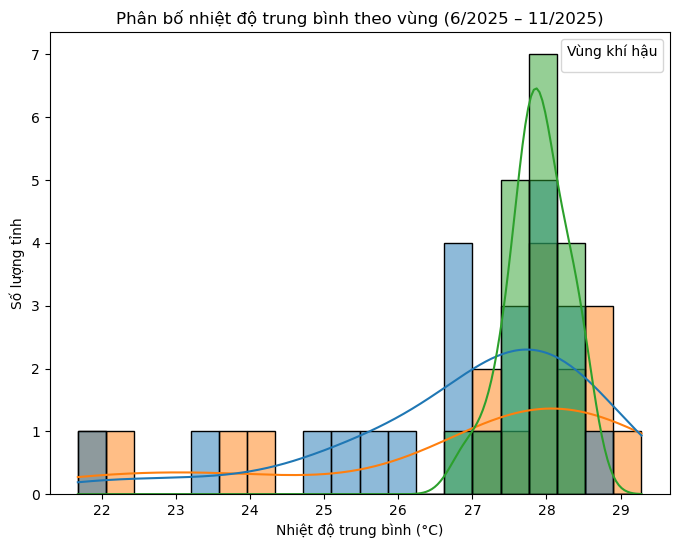

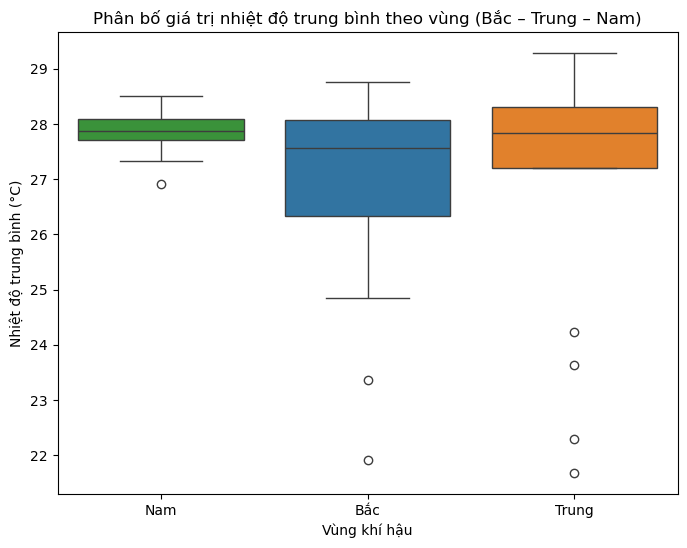

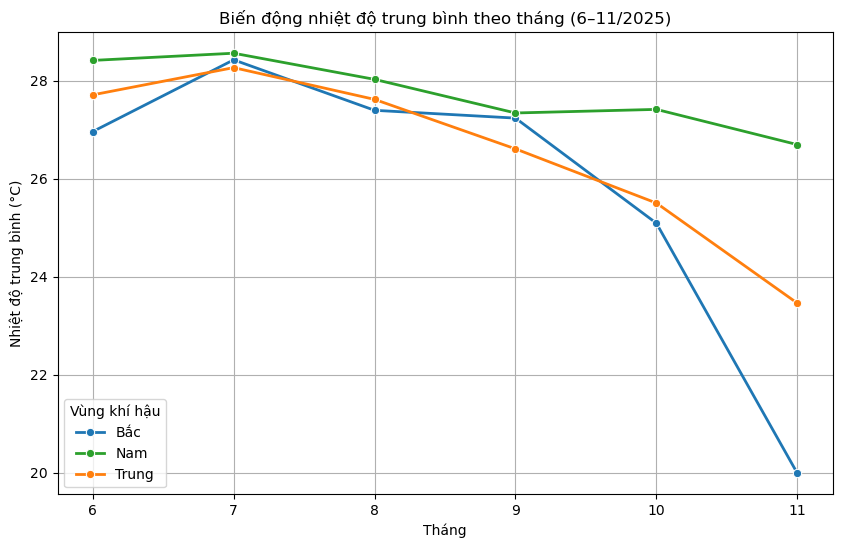

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================
# Tạo bảng màu thống nhất cho 3 vùng
# ============================================
region_colors = {
    'Bắc': '#1f77b4',     # Xanh dương
    'Trung': '#ff7f0e',   # Cam
    'Nam': '#2ca02c'      # Xanh lá
}
# Trung bình nhiệt độ theo tỉnh (để phân tích phân bố)
province_avg = data.groupby(['province', 'region'], as_index=False)['temperature'].mean()

# Trung bình nhiệt độ theo tháng và vùng (để vẽ đường xu hướng)
month_region_avg = data.groupby(['month', 'region'], as_index=False)['temperature'].mean()

# ============================================
# (a) Histogram - Phân bố nhiệt độ theo vùng
# ============================================
plt.figure(figsize=(8,6))
sns.histplot(
    data=province_avg,
    x='temperature',
    hue='region',
    palette=region_colors,
    bins=20,
    kde=True
)
plt.title('Phân bố nhiệt độ trung bình theo vùng (6/2025 – 11/2025)')
plt.xlabel('Nhiệt độ trung bình (°C)')
plt.ylabel('Số lượng tỉnh')
plt.legend(title='Vùng khí hậu')
plt.show()

# ============================================
# (b) Boxplot - Biên độ dao động theo vùng
# ============================================
plt.figure(figsize=(8,6))
sns.boxplot(
    data=province_avg,
    x='region',
    y='temperature',
    palette=region_colors
)
plt.title('Phân bố giá trị nhiệt độ trung bình theo vùng (Bắc – Trung – Nam)')
plt.xlabel('Vùng khí hậu')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.show()

# ============================================
# (c) Lineplot - Biến động nhiệt độ theo tháng
# ============================================
plt.figure(figsize=(10,6))
sns.lineplot(
    data=month_region_avg,
    x='month',
    y='temperature',
    hue='region',
    palette=region_colors,
    marker='o',
    linewidth=2
)
plt.title('Biến động nhiệt độ trung bình theo tháng (6–11/2025)')
plt.xlabel('Tháng')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.legend(title='Vùng khí hậu')
plt.grid(True)
plt.show()

Biểu đồ histogram cho thấy sự khác biệt rõ rệt về nhiệt độ trung bình giữa các vùng khí hậu của Việt Nam trong giai đoạn 6/2025 – 11/2025.

- Miền Bắc (vùng khí hậu 1) có độ phân tán lớn nhất, xuất hiện cả các giá trị thấp ~22–24°C do ảnh hưởng của mưa nhiều và lạnh sớm.

- Miền Trung có nhiệt độ trải rộng hơn, dao động từ 25–29°C, phản ánh biến động thời tiết mạnh trong thời kỳ mưa bão.

- Miền Nam ổn định nhất, tập trung chủ yếu quanh 27.5–28.5°C, thể hiện khí hậu nóng và ít biến động.

Đường KDE giúp làm rõ hình dạng phân bố: miền Nam có đỉnh nhọn và tập trung, trong khi miền Bắc và miền Trung có sự phân tán rộng hơn.

Mục đích của biểu đồ

- So sánh mức độ chênh lệch nhiệt độ trung bình giữa các vùng khí hậu.

- Xác định mức độ ổn định hay biến động của khí hậu từng vùng.

- Hỗ trợ quá trình giải thích vì sao các tỉnh được phân vào các cụm khí hậu khác nhau trong bước phân cụm (K-Means).

- Cung cấp cái nhìn trực quan giúp nhận diện các vùng có đặc trưng nhiệt độ tương đồng để phục vụ phân tích chuyên sâu.

Biểu đồ boxplot cho thấy sự khác biệt về nhiệt độ trung bình giữa ba vùng khí hậu Bắc – Trung – Nam.

- Vùng Nam có dải nhiệt độ hẹp nhất và ổn định nhất, tập trung quanh 27.8°C với ít điểm ngoại lai.

- Vùng Bắc có độ phân tán lớn hơn, xuất hiện nhiều giá trị thấp (≈ 22–24°C), chủ yếu do ảnh hưởng lạnh sớm và mưa nhiều trong giai đoạn khảo sát.

- Vùng Trung có giá trị trung vị cao, nhưng đồng thời xuất hiện một số điểm thấp bất thường do tác động của bão và nhiễu động thời tiết.

Các điểm tròn dưới đáy biểu đồ thể hiện giá trị ngoại lai, phản ánh sự biến động mạnh hơn của nhiệt độ tại Bắc và Trung so với Nam.

Mục đích của biểu đồ

- So sánh mức độ dao động nhiệt độ giữa ba vùng khí hậu.

- Nhận diện các vùng có tính ổn định cao (như Nam) và các vùng có biến động mạnh (như Bắc, Trung).

- Hỗ trợ đánh giá tính khác biệt khí hậu giữa các vùng để phục vụ phân cụm và mô hình phân tích khí hậu.

Biểu đồ đường thể hiện xu hướng biến động nhiệt độ trung bình theo tháng của ba vùng Bắc – Trung – Nam trong giai đoạn 6–11/2025.

- Cả ba vùng đều đạt nhiệt độ cao nhất vào tháng 7, sau đó giảm dần theo thời gian.

- Miền Bắc có biên độ giảm mạnh nhất: từ ~28.3°C xuống còn ~20°C vào tháng 11, phản ánh sự chuyển mùa rõ rệt sang thời tiết lạnh.

- Miền Nam giảm nhẹ hơn, vẫn duy trì mức nhiệt ổn định do đặc trưng khí hậu nhiệt đới.

- Miền Trung giảm nhưng ít đột ngột hơn miền Bắc, do vừa chịu ảnh hưởng khí hậu nhiệt đới, vừa chịu tác động của bão trong tháng 9–10.

Biểu đồ cho thấy sự khác biệt rõ rệt về tốc độ và mức độ giảm nhiệt của từng vùng khí hậu.

Mục đích của biểu đồ

- Theo dõi xu hướng biến đổi nhiệt độ theo thời gian ở từng vùng.

- So sánh mức độ ổn định – biến động giữa Bắc, Trung và Nam.

- Làm cơ sở để giải thích sự khác biệt khí hậu theo mùa tại Việt Nam.

- Hỗ trợ phân tích sâu hơn trong phân cụm dữ liệu và đánh giá điều kiện khí hậu từng vùng.

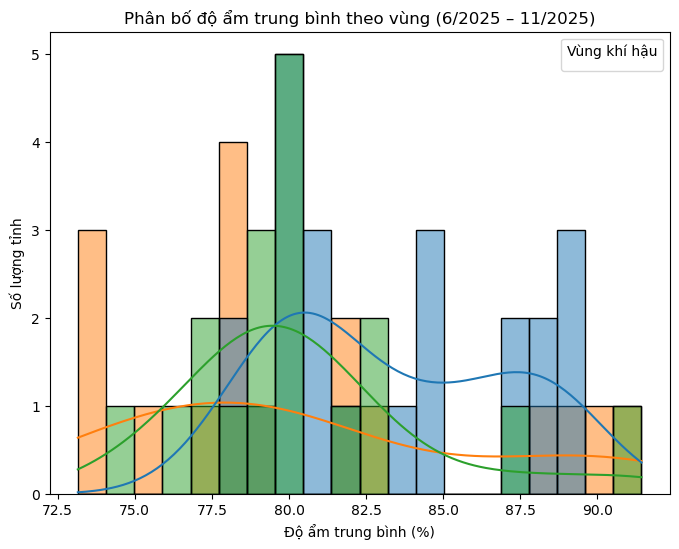

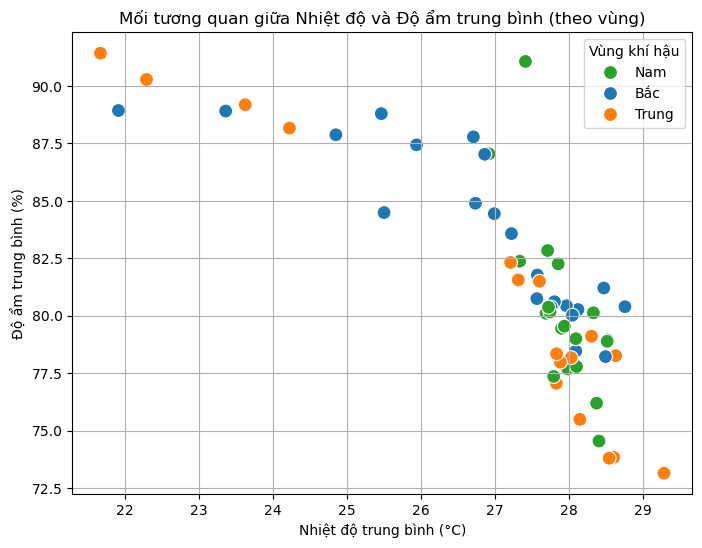

In [19]:
# ============================================
# Bảng màu thống nhất 3 vùng (dùng chung với đoạn code trước)
# ============================================
region_colors = {
    'Bắc': '#1f77b4',     # Xanh dương
    'Trung': '#ff7f0e',   # Cam
    'Nam': '#2ca02c'      # Xanh lá
}

province_avg = data.groupby(['province', 'region'], as_index=False)[['temperature', 'humidity']].mean()

# ============================================
# (a) Histogram – Phân bố độ ẩm theo vùng
# ============================================
plt.figure(figsize=(8,6))
sns.histplot(
    data=province_avg,
    x='humidity',
    hue='region',
    bins=20,
    kde=True,
    palette=region_colors          # áp dụng bảng màu thống nhất
)
plt.title('Phân bố độ ẩm trung bình theo vùng (6/2025 – 11/2025)')
plt.xlabel('Độ ẩm trung bình (%)')
plt.ylabel('Số lượng tỉnh')
plt.legend(title='Vùng khí hậu')
plt.show()

# ============================================
# (b) Scatter Plot – Quan hệ Nhiệt độ – Độ ẩm
# ============================================
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=province_avg,
    x='temperature',
    y='humidity',
    hue='region',
    s=100,
    palette=region_colors          # thống nhất màu
)
plt.title('Mối tương quan giữa Nhiệt độ và Độ ẩm trung bình (theo vùng)')
plt.xlabel('Nhiệt độ trung bình (°C)')
plt.ylabel('Độ ẩm trung bình (%)')
plt.legend(title='Vùng khí hậu')
plt.grid(True)
plt.show()


Biểu đồ histogram cho thấy sự phân bố độ ẩm trung bình của ba vùng khí hậu Bắc – Trung – Nam trong giai đoạn 6/2025 – 11/2025.

- Miền Bắc có độ ẩm cao nhất, nhiều tỉnh nằm trong khoảng 85–90%, phản ánh điều kiện thời tiết ẩm ướt, đặc biệt trong các tháng mưa nhiều.

- Miền Trung có phân bố rộng hơn, dao động từ 74–90%. Điều này thể hiện sự biến động mạnh do chịu ảnh hưởng mưa bão và thời tiết thất thường.

- Miền Nam có xu hướng tập trung quanh mức 76–82%, ổn định và ít dao động hơn hai vùng còn lại.

Đường KDE giúp làm rõ hình dạng phân bố, cho thấy miền Bắc nghiêng hẳn về độ ẩm cao, trong khi miền Nam ở mức độ ẩm vừa và ổn định.

Mục đích của biểu đồ

- So sánh đặc trưng độ ẩm trung bình của ba vùng khí hậu.

- Nhận diện vùng có mức ẩm cao, ổn định hoặc biến động mạnh.

- Hỗ trợ giải thích sự khác biệt khí hậu giữa các vùng trong phân tích và phân cụm dữ liệu.

- Cung cấp góc nhìn trực quan về phạm vi và xu hướng độ ẩm từng khu vực.

Biểu đồ scatter thể hiện mối tương quan giữa nhiệt độ trung bình và độ ẩm trung bình của ba vùng Bắc – Trung – Nam. Quan sát cho thấy xu hướng tương quan nghịch: khi nhiệt độ tăng thì độ ẩm có xu hướng giảm.

- Miền Bắc xuất hiện nhiều điểm có độ ẩm rất cao (85–90%) ở mức nhiệt thấp, phù hợp với đặc trưng thời tiết ẩm ướt và mưa nhiều.

- Miền Trung phân tán rộng, thể hiện sự biến động mạnh do ảnh hưởng của bão và dải hội tụ nhiệt đới.

- Miền Nam tập trung ở vùng nhiệt độ cao hơn (27–29°C) và độ ẩm dao động quanh mức 77–82%, phản ánh khí hậu nóng ẩm ổn định.

Sự phân tách giữa các cụm điểm theo từng vùng cho thấy đặc trưng khí hậu riêng biệt của mỗi khu vực.

Mục đích của biểu đồ

- Xác định mối quan hệ giữa nhiệt độ và độ ẩm trong dữ liệu khí hậu.

- So sánh sự khác biệt tương quan giữa ba vùng khí hậu.

- Hỗ trợ đánh giá lý do vì sao các vùng khí hậu được phân cụm khác nhau trong mô hình K-Means.

- Cung cấp trực quan giúp nhận diện vùng khí hậu có độ ẩm cao – nhiệt độ thấp hoặc ngược lại.

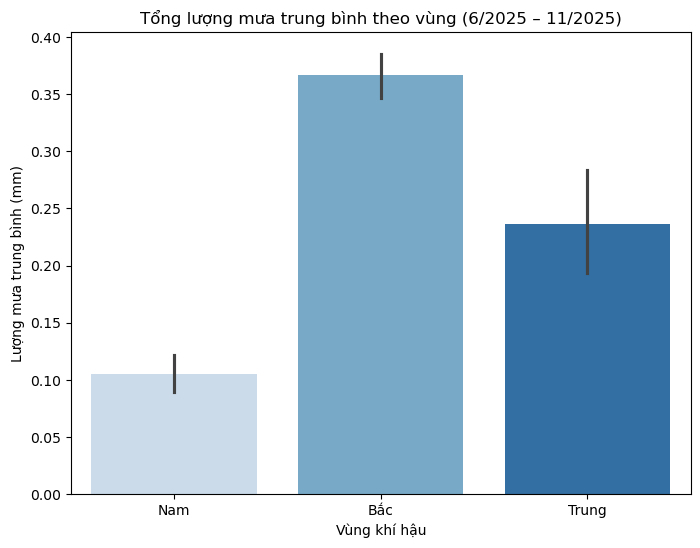

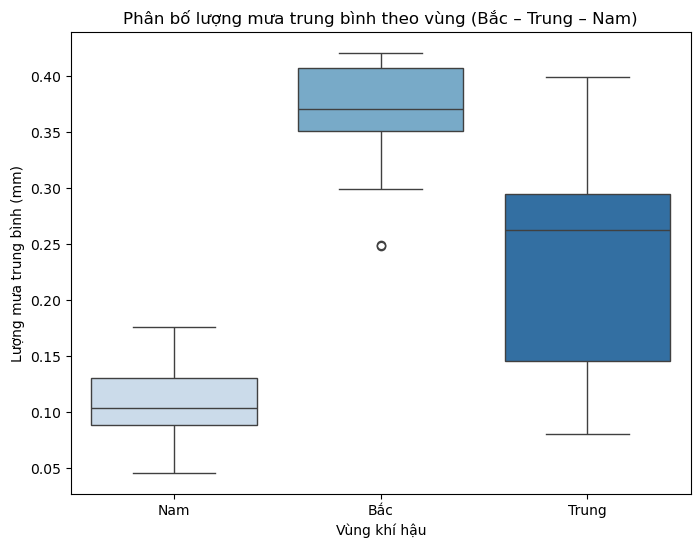

In [20]:
province_avg = data.groupby(['province', 'region'], as_index=False)['precipitation'].mean()
month_region_avg = data.groupby(['month', 'region'], as_index=False)['precipitation'].mean()

# --- Biểu đồ 1: Bar chart – Lượng mưa trung bình theo vùng ---
plt.figure(figsize=(8,6))
sns.barplot(data=province_avg, x='region', y='precipitation', palette='Blues')
plt.title('Tổng lượng mưa trung bình theo vùng (6/2025 – 11/2025)')
plt.xlabel('Vùng khí hậu')
plt.ylabel('Lượng mưa trung bình (mm)')
plt.show()

# --- Biểu đồ 2: Boxplot – Biên độ lượng mưa trung bình theo vùng ---
plt.figure(figsize=(8,6))
sns.boxplot(data=province_avg, x='region', y='precipitation', palette='Blues')
plt.title('Phân bố lượng mưa trung bình theo vùng (Bắc – Trung – Nam)')
plt.xlabel('Vùng khí hậu')
plt.ylabel('Lượng mưa trung bình (mm)')
plt.show()

Biểu đồ cột thể hiện tổng lượng mưa trung bình của ba vùng Bắc – Trung – Nam trong giai đoạn 6/2025 – 11/2025.

- Miền Bắc có lượng mưa trung bình cao nhất (~0.37 mm), phản ánh thời kỳ mưa nhiều kéo dài vào mùa hè và đầu thu.

- Miền Trung đứng thứ hai (~0.24 mm), cho thấy ảnh hưởng rõ rệt của bão và áp thấp nhiệt đới trong các tháng 9–10.

- Miền Nam có lượng mưa trung bình thấp nhất (~0.11 mm) và ít biến động hơn, phù hợp với đặc trưng mùa khô vào nửa cuối năm.

Thanh sai số (error bar) cho thấy miền Bắc và Trung có mức độ biến động lượng mưa lớn hơn so với miền Nam.

Mục đích của biểu đồ

- So sánh mức độ mưa trung bình giữa ba vùng khí hậu.

- Nhận diện vùng có lượng mưa cao – thấp và mức độ biến động của từng khu vực.

- Hỗ trợ đánh giá điều kiện khí hậu theo mùa và giải thích sự khác biệt trong phân cụm khí hậu giữa các vùng.

- Cung cấp cái nhìn trực quan giúp hiểu rõ sự phân bố mưa trong giai đoạn nghiên cứu.

Biểu đồ boxplot mô tả phân bố lượng mưa trung bình của ba vùng khí hậu Bắc – Trung – Nam.

- Miền Bắc có lượng mưa cao nhất và phân bố khá đồng đều, với giá trị tập trung quanh 0.36–0.40 mm, thể hiện đặc trưng mùa mưa rõ rệt.

- Miền Trung có độ phân tán lớn nhất: lượng mưa dao động từ 0.08 đến 0.40 mm. Điều này phản ánh sự biến động mạnh do ảnh hưởng của bão và dải hội tụ nhiệt đới.

- Miền Nam có lượng mưa thấp nhất, tập trung quanh 0.10–0.13 mm và ít điểm ngoại lai, cho thấy sự ổn định trong giai đoạn cuối mùa mưa – đầu mùa khô.

Biểu đồ làm rõ sự khác biệt về mức độ mưa và độ biến động giữa các vùng khí hậu.

Mục đích của biểu đồ

- So sánh mức độ trung bình – biến động – ngoại lai của lượng mưa giữa ba vùng.

- Nhận diện vùng mưa nhiều, vùng mưa ít và mức độ dao động theo khu vực.

- Hỗ trợ đánh giá sự khác biệt khí hậu theo mùa và lý giải kết quả phân cụm.

- Cung cấp cái nhìn trực quan về cách lượng mưa phân bố theo từng vùng địa lý.

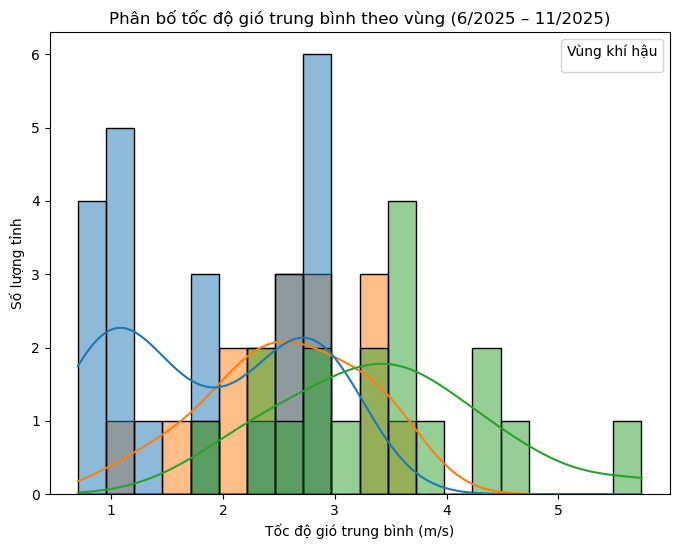

In [21]:
region_colors = {
    'Bắc': '#1f77b4',     # Xanh dương
    'Trung': '#ff7f0e',   # Cam
    'Nam': '#2ca02c'      # Xanh lá
}
    
province_avg_wind = data.groupby(['province', 'region'], as_index=False)['wind_speed'].mean()

# --- Biểu đồ Histogram – Phân bố tốc độ gió trung bình theo vùng ---
plt.figure(figsize=(8,6))
sns.histplot(
    data=province_avg_wind,
    x='wind_speed',
    hue='region',
    bins=20,
    kde=True,
    palette=region_colors     # áp dụng bảng màu thống nhất
)
plt.title('Phân bố tốc độ gió trung bình theo vùng (6/2025 – 11/2025)')
plt.xlabel('Tốc độ gió trung bình (m/s)')
plt.ylabel('Số lượng tỉnh')
plt.legend(title='Vùng khí hậu')
plt.show()

Biểu đồ histogram thể hiện phân bố tốc độ gió trung bình của ba vùng Bắc – Trung – Nam trong giai đoạn 6/2025 – 11/2025.

- Miền Nam có tốc độ gió thấp nhất, chủ yếu tập trung từ 1.0–2.0 m/s, cho thấy sự ổn định và ít chịu ảnh hưởng của gió mạnh.

- Miền Bắc có tốc độ gió trải rộng từ 1.0–3.0 m/s, phản ánh sự thay đổi theo mùa rõ rệt giữa gió mùa hè và đầu đông.

- Miền Trung có tốc độ gió cao và phân tán nhất, với nhiều điểm vượt 4–5 m/s, đặc trưng cho khu vực thường xuyên chịu ảnh hưởng của bão và áp thấp nhiệt đới.

Đường KDE giúp thể hiện rõ hình dạng phân bố: miền Nam nằm thấp và hẹp, miền Bắc trải rộng, còn miền Trung nghiêng về các giá trị cao hơn.

Mục đích của biểu đồ

- So sánh mức tốc độ gió trung bình giữa các vùng.

- Nhận diện vùng có gió mạnh – gió yếu và mức độ biến động của từng khu vực.

- Hỗ trợ phân tích đặc trưng khí hậu để giải thích kết quả phân cụm.

- Cung cấp trực quan cho thấy ảnh hưởng của địa hình và thời tiết từng vùng đến tốc độ gió.

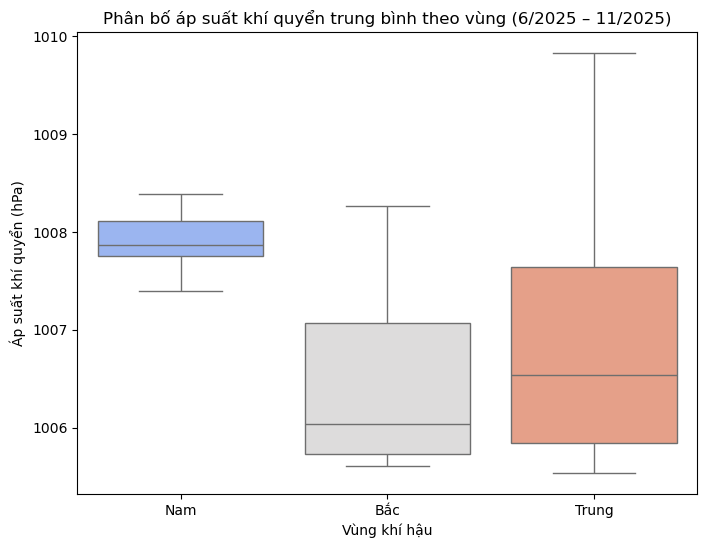

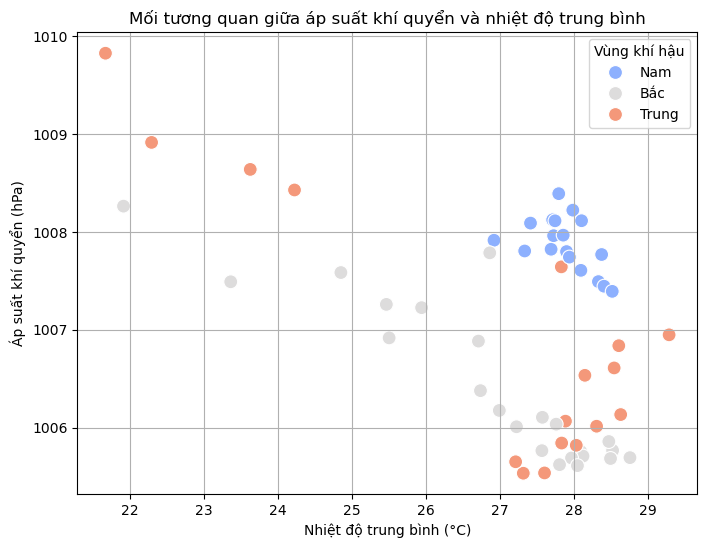

In [22]:
province_avg_pressure = data.groupby(['province', 'region'], as_index=False)['pressure'].mean()

# --- Boxplot: so sánh áp suất giữa các vùng ---
plt.figure(figsize=(8,6))
sns.boxplot(data=province_avg_pressure, x='region', y='pressure', palette='coolwarm')
plt.title('Phân bố áp suất khí quyển trung bình theo vùng (6/2025 – 11/2025)')
plt.xlabel('Vùng khí hậu')
plt.ylabel('Áp suất khí quyển (hPa)')
plt.show()

# --- Scatter Plot: tương quan áp suất và nhiệt độ ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=province_avg_pressure.merge(
    data.groupby(['province'], as_index=False)['temperature'].mean(),
    on='province', how='left'),
    x='temperature', y='pressure', hue='region', s=100, palette='coolwarm')
plt.title('Mối tương quan giữa áp suất khí quyển và nhiệt độ trung bình')
plt.xlabel('Nhiệt độ trung bình (°C)')
plt.ylabel('Áp suất khí quyển (hPa)')
plt.legend(title='Vùng khí hậu')
plt.grid(True)
plt.show()

Biểu đồ boxplot thể hiện phân bố áp suất khí quyển trung bình của ba vùng Bắc – Trung – Nam trong giai đoạn 6/2025 – 11/2025.

- Miền Nam có giá trị áp suất ổn định nhất, tập trung quanh 1008 hPa và ít biến động.

- Miền Bắc có áp suất thấp hơn, dao động quanh 1006–1007 hPa, phản ánh sự thay đổi theo mùa rõ rệt khi bước vào giai đoạn chuyển lạnh.

- Miền Trung có độ phân tán lớn nhất, trải rộng từ 1005 đến hơn 1010 hPa, cho thấy khu vực chịu ảnh hưởng mạnh từ bão, gió mùa và các nhiễu động khí quyển.

Boxplot cho thấy sự khác biệt đáng kể về mức độ ổn định và dao động áp suất của từng vùng.

Mục đích của biểu đồ

- So sánh mức áp suất trung bình và mức độ dao động giữa các vùng khí hậu.

- Nhận diện khu vực có áp suất ổn định (Nam) và khu vực chịu tác động mạnh của thời tiết (Trung).

- Hỗ trợ đánh giá đặc trưng khí hậu phục vụ phân tích và phân cụm dữ liệu.

- Cung cấp trực quan giúp hiểu rõ sự khác biệt trong cấu trúc khí quyển của từng vùng.

Biểu đồ scatter mô tả mối tương quan giữa áp suất khí quyển và nhiệt độ trung bình của ba vùng Bắc – Trung – Nam.

- Miền Trung có xu hướng áp suất cao hơn (1008–1010 hPa) ở mức nhiệt thấp hơn, cho thấy ảnh hưởng mạnh từ bão và nhiễu động khí quyển.

- Miền Bắc tập trung chủ yếu ở mức áp suất 1006–1007 hPa và nhiệt độ 26–29°C, phản ánh sự chuyển mùa rõ rệt từ hè sang thu – đông.

- Miền Nam thể hiện nhóm điểm ổn định, với nhiệt độ cao (27–29°C) và áp suất quanh 1008 hPa.

Biểu đồ cho thấy sự tách biệt tương đối giữa ba vùng khí hậu, thể hiện đặc trưng khí quyển riêng của từng khu vực.

Mục đích của biểu đồ

- Quan sát quan hệ giữa nhiệt độ và áp suất khí quyển.

- So sánh sự khác biệt về đặc trưng khí hậu giữa ba vùng.

- Xác định các nhóm đặc trưng phục vụ cho phân tích khí hậu và phân cụm dữ liệu.

- Cung cấp trực quan giúp nhận diện vùng có áp suất cao – thấp tương ứng với điều kiện nhiệt độ.

# Ma trận biểu diễn thời tiết

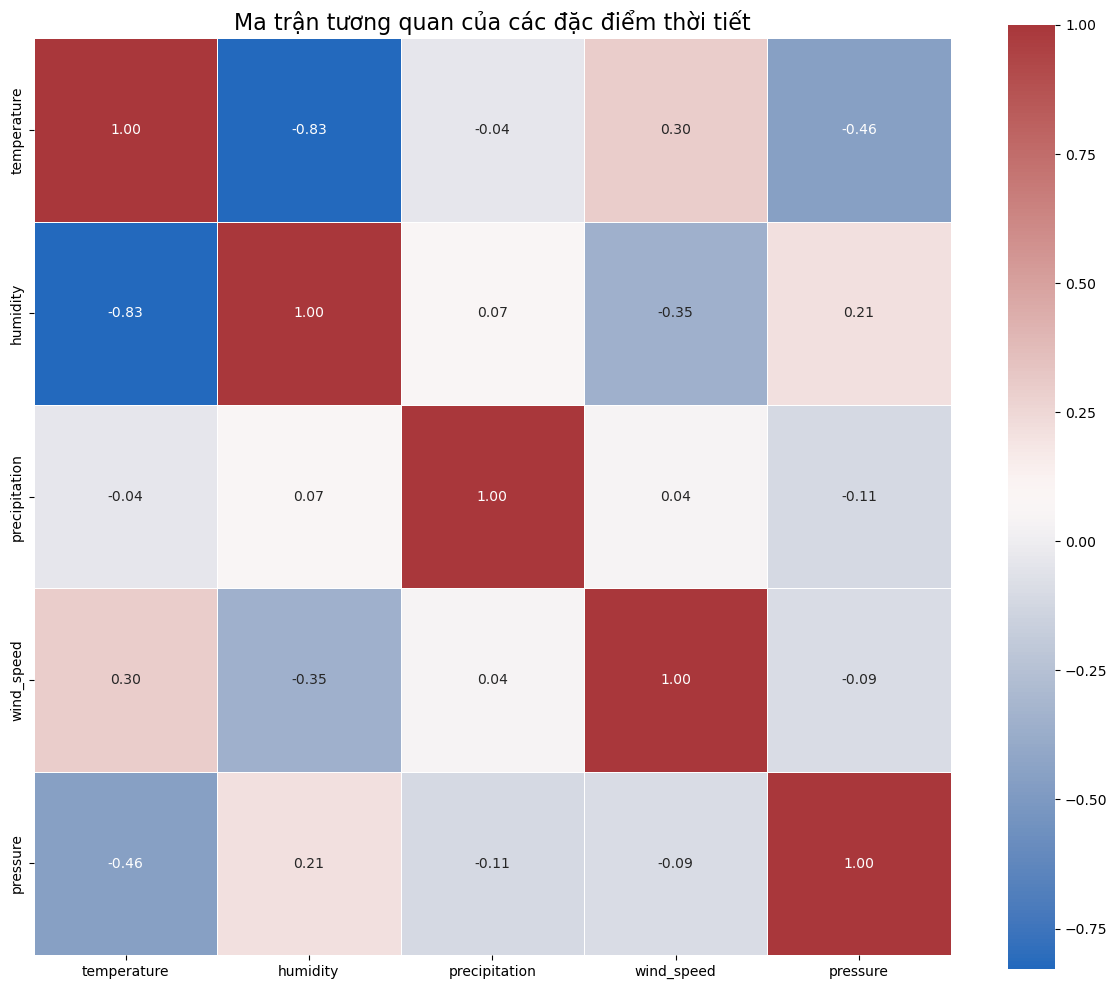

In [23]:
# Lựa chịn các cột dữ liệu thời tiết
weather_cols = [
    'temperature',
    'humidity',
    'precipitation' ,
    'wind_speed',
    'pressure'
]

# Tập hợp con của DataFrame
data_weather = data[weather_cols]

# Tính toán ma trận tương quan
corr = data_weather.corr(method='pearson')

# Biểu đồ nhiệt tương quan
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='vlag', fmt=".2f", square=True, linewidths=0.5)
plt.title("Ma trận tương quan của các đặc điểm thời tiết", fontsize=16)
plt.tight_layout()
plt.show()

Ma trận cho biết:
- Gần +1.00: Khi một đặc trưng tăng, đặc trưng kia cũng tăng theo (Độ tương quan thuận mạnh).
- Gần -1.00: Khi một đặc trưng tăng, đặc trưng kia có xu hướng giảm (Độ tương quan nghịch).
- Gần 0.00: Hai đặc trưng ít có mối quan hệ tuyến tính với nhau (Không có độ tương quan dữ liệu

Ma trận tương quan thể hiện mức độ liên hệ giữa các đặc điểm khí hậu: nhiệt độ, độ ẩm, lượng mưa, tốc độ gió và áp suất khí quyển.

- Nhiệt độ và độ ẩm có tương quan nghịch mạnh (-0.83), cho thấy khi nhiệt độ tăng thì độ ẩm có xu hướng giảm rõ rệt.

- Nhiệt độ và áp suất cũng có tương quan âm vừa (-0.46), phản ánh sự thay đổi của khí quyển theo chu kỳ thời tiết.

- Độ ẩm và tốc độ gió có tương quan âm (-0.35), thể hiện ảnh hưởng của gió tới mức ẩm trong không khí.

- Lượng mưa gần như không có tương quan tuyến tính mạnh với các biến còn lại, vì phụ thuộc nhiều vào thời tiết cực đoan và bão, không mang tính ổn định theo tuyến tính.

Màu sắc đậm nhạt trong heatmap cho thấy rõ độ mạnh yếu của từng mối quan hệ.

Mục đích của biểu đồ

- Giúp nhận diện những mối quan hệ tuyến tính mạnh giữa các đặc trưng khí hậu.

- Hỗ trợ lựa chọn các biến đầu vào phù hợp cho mô hình phân tích hoặc phân cụm.

- Phát hiện biến nào mang thông tin khác biệt, biến nào bị trùng lặp hoặc phụ thuộc mạnh lẫn nhau.

Lựa chọn trường dữ liệu để huấn luyện
Nhiệt độ (temperature)

- Tương quan mạnh với nhiều biến khác (độ ẩm và áp suất).

- Đại diện tốt cho điều kiện nhiệt của từng vùng → biến quan trọng nhất.

Độ ẩm (humidity)

- Có quan hệ nghịch rất mạnh với nhiệt độ → cung cấp thông tin bổ sung mà nhiệt độ không thể biểu diễn.

- Là yếu tố quyết định trong phân biệt khí hậu Bắc – Trung – Nam.

Lượng mưa (precipitation)

- Tương quan rất yếu với các trường khác → độc lập, mang thông tin riêng biệt.

- Giúp mô hình phân cụm nhận diện các vùng chịu ảnh hưởng bão, mưa lớn (đặc trưng của Trung Bộ và Bắc Bộ).

# Lưu dữ liệu đã được làm sạch

In [24]:
# Giữ lại 3 trường quan trọng
important_cols = ['province', 'temperature', 'humidity', 'precipitation'] #'wind_speed', 'pressure', 'cloudcover'
data = data[important_cols]

# Lưu dữ liệu đã chọn lọc
file_clean = 'Data/data_cleanned.csv'
data.to_csv(file_clean, index=False, encoding='utf-8')

print("Đã lưu dữ liệu chỉ với 4 trường quan trọng:", important_cols)

Đã lưu dữ liệu chỉ với 4 trường quan trọng: ['province', 'temperature', 'humidity', 'precipitation']


# Huấn luyện mô hình

In [25]:
# Sử dụng dữ liệu đã làm sạch để huấn luyện
data.to_csv('Data/data_cleanned.csv',index=None)

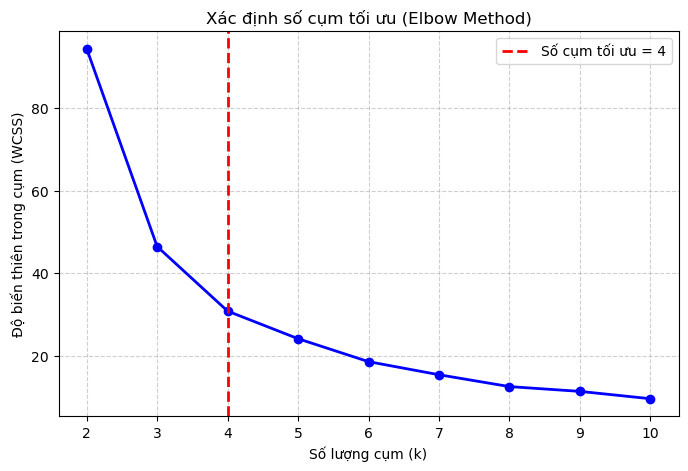

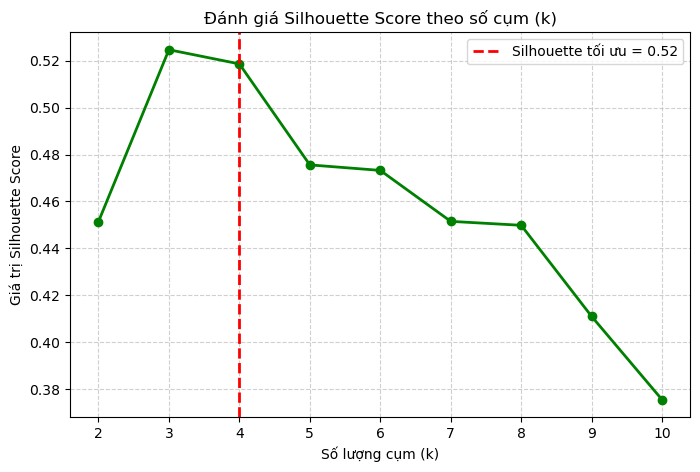

Kết quả đánh giá:
Số cụm tối ưu được chọn (k) = 4
Silhouette Score = 0.52


In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# ---  Chuẩn bị dữ liệu trung bình theo tỉnh ---
X = data.groupby('province', as_index=False)[['temperature', 'humidity', 'precipitation']].mean()

# ---  Chuẩn hóa dữ liệu ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['temperature', 'humidity', 'precipitation']])

# ---  Tính WCSS (Elbow) và Silhouette Score cho k = 2 → 10 ---
wcss = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# ---  Xác định số cụm tối ưu (từ Elbow hoặc Silhouette) ---
optimal_k = 4  # theo kết quả điểm gãy Elbow và Silhouette ~ 0.46

# ---  Biểu đồ Elbow Method ---
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-', color='blue', linewidth=2, markersize=6)
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Số cụm tối ưu = {optimal_k}')
plt.title('Xác định số cụm tối ưu (Elbow Method)', fontsize=12)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Độ biến thiên trong cụm (WCSS)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ---  Biểu đồ Silhouette Score ---
plt.figure(figsize=(8,5))
plt.plot(K, sil_scores, 'go-', linewidth=2, markersize=6)
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Silhouette tối ưu = {sil_scores[optimal_k-2]:.2f}')
plt.title('Đánh giá Silhouette Score theo số cụm (k)', fontsize=12)
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Giá trị Silhouette Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ---  In kết quả tổng kết ---
print("Kết quả đánh giá:")
print(f"Số cụm tối ưu được chọn (k) = {optimal_k}")
print(f"Silhouette Score = {sil_scores[optimal_k-2]:.2f}")


Để xác định cụm tối ưu:

- Từ k = 2 đến k = 3: Giảm rất mạnh.
- Từ k=3 đến k=4: Giảm vẫn còn đáng kể nhưng bắt đầu chậm lại
- Tại k=4: Đường cong trở nên phẳng, WCSS giảm ít

=> Do đó chọn k = 4, vì đường cong trở nên gần như tuyến tính -> thêm cụm không cải thiện nhiều chất lượng phân tách.

Silhouette Score: Giá trị 0.46–0.52, thuộc ngưỡng chấp nhận được đối với dữ liệu khí hậu có sự chuyển tiếp vùng
- Với K = 3: Tách biệt mạnh nhưng đơn giản hóa quá mức.
- Với k = 4: Hợp lý hơn, vừa đảm bảo tính chi tiết trong phân vùng, vừa phản ánh được bốn nhóm khí hậu chủ đạo.

=> Chọn K = 4 để huấn luyện mô hình

# Phân cụm với K = 4

🎯 Tâm cụm khí hậu (đơn vị gốc):


,temperature,humidity,precipitation,Cluster
0,27.960929,80.111565,0.365251,0
1,28.089232,78.195555,0.107666,1
2,22.849027,89.484378,0.228774,2
3,26.338298,87.087284,0.303909,3


📊 Số lượng tỉnh trong mỗi cụm:
Cluster
0    21
1    21
2     6
3    10
Name: count, dtype: int64


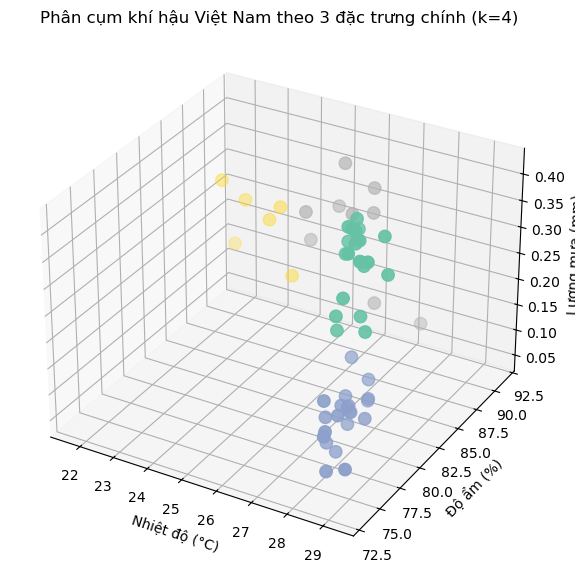

In [27]:
# --- Import thư viện ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# --- Chuẩn bị dữ liệu trung bình theo tỉnh ---
province_avg = data.groupby('province', as_index=False)[['temperature', 'humidity', 'precipitation']].mean()

# --- Chuẩn hóa dữ liệu ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(province_avg[['temperature', 'humidity', 'precipitation']])

# --- Huấn luyện mô hình K-Means với k = 4 ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
province_avg['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Lấy tâm cụm (centroids) ---
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_), 
    columns=['temperature', 'humidity', 'precipitation']
)
centroids['Cluster'] = range(4)
print("🎯 Tâm cụm khí hậu (đơn vị gốc):")
display(centroids)

# --- Hiển thị số lượng tỉnh mỗi cụm ---
print("📊 Số lượng tỉnh trong mỗi cụm:")
print(province_avg['Cluster'].value_counts().sort_index())

# --- Biểu đồ 3D: Temp – Humidity – Rain ---
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    province_avg['temperature'],
    province_avg['humidity'],
    province_avg['precipitation'],
    c=province_avg['Cluster'],
    cmap='Set2',
    s=80
)
ax.set_xlabel('Nhiệt độ (°C)')
ax.set_ylabel('Độ ẩm (%)')
ax.set_zlabel('Lượng mưa (mm)')
ax.set_title('Phân cụm khí hậu Việt Nam theo 3 đặc trưng chính (k=4)')
plt.show()

Mục đích của biểu đồ

- Trực quan hóa kết quả phân cụm dựa trên 3 đặc trưng khí hậu quan trọng nhất.

- Quan sát sự tách biệt của các nhóm khí hậu trong không gian 3 chiều.

- Kiểm tra mức độ hợp lý của số cụm k=4 và đánh giá tính khác biệt giữa các vùng khí hậu.

- Hỗ trợ giải thích bản chất của từng cụm theo các điều kiện khí hậu thực tế.

In [28]:
# --- CỤM 0 ---
cluster_0 = province_avg[province_avg['Cluster'] == 0][['province', 'temperature', 'humidity', 'precipitation']]
print("=== CỤM 0 ===")
print(f"Số tỉnh/thành trong cụm 0: {cluster_0.shape[0]}")
display(cluster_0.sort_values(by='temperature', ascending=False))

=== CỤM 0 ===
Số tỉnh/thành trong cụm 0: 21


,province,temperature,humidity,precipitation
24,Hai Phong,28.754456,80.396186,0.354481
14,Da Nang,28.629180,78.262136,0.276795
5,Bac Ninh,28.520091,78.951161,0.392371
21,Ha Noi,28.491986,78.224715,0.402174
56,Vinh Phuc,28.469018,81.209398,0.408282
42,Quang Nam,28.303801,79.113226,0.287105
23,Hai Duong,28.120237,80.273199,0.360368
2,Bac Giang,28.090516,78.462884,0.406353
35,Nam Dinh,28.045292,80.026541,0.408641
41,Quang Binh,28.029203,78.179340,0.328077


In [29]:
# --- CỤM 1 ---
cluster_1 = province_avg[province_avg['Cluster'] == 1][['province', 'temperature', 'humidity', 'precipitation']]
print("=== CỤM 1 ===")
print(f"Số tỉnh/thành trong cụm 1: {cluster_1.shape[0]}")
display(cluster_1.sort_values(by='temperature', ascending=False))

=== CỤM 1 ===
Số tỉnh/thành trong cụm 1: 21


,province,temperature,humidity,precipitation
28,Khanh Hoa,29.282899,73.150534,0.110219
38,Ninh Thuan,28.603657,73.845404,0.080864
40,Phu Yen,28.540701,73.803706,0.145620
52,Tp Ho Chi Minh,28.515198,78.892907,0.102231
48,Tay Ninh,28.404472,74.550814,0.140444
0,An Giang,28.371853,76.198132,0.145647
8,Binh Duong,28.328452,80.129537,0.117910
7,Binh Dinh,28.145803,75.493802,0.178944
29,Kien Giang,28.100786,77.793932,0.135266
34,Long An,28.091776,79.001514,0.104091


In [30]:
# --- CỤM 2 ---
cluster_2 = province_avg[province_avg['Cluster'] == 2][['province', 'temperature', 'humidity', 'precipitation']]
print("=== CỤM 2 ===")
print(f"Số tỉnh/thành trong cụm 2: {cluster_2.shape[0]}")
display(cluster_2.sort_values(by='temperature', ascending=False))

=== CỤM 2 ===
Số tỉnh/thành trong cụm 2: 6


,province,temperature,humidity,precipitation
15,Dak Lak,24.224309,88.168119,0.163478
30,Kon Tum,23.626566,89.186301,0.273712
47,Son La,23.362986,88.910754,0.248058
19,Gia Lai,22.294044,90.282272,0.250450
31,Lai Chau,21.914973,88.932663,0.299228
16,Dak Nong,21.671281,91.426158,0.137719


In [31]:
# --- CỤM 3 ---
cluster_3 = province_avg[province_avg['Cluster'] == 3][['province', 'temperature', 'humidity', 'precipitation']]
print("=== CỤM 3 ===")
print(f"Số tỉnh/thành trong cụm 3: {cluster_3.shape[0]}")
display(cluster_3.sort_values(by='temperature', ascending=False))

=== CỤM 3 ===
Số tỉnh/thành trong cụm 3: 10


,province,temperature,humidity,precipitation
12,Can Tho,27.411291,91.068737,0.089161
57,Yen Bai,26.990372,84.442708,0.334328
9,Binh Phuoc,26.918155,87.047060,0.176012
33,Lao Cai,26.861043,87.028101,0.347540
26,Hoa Binh,26.735709,84.897480,0.370768
20,Ha Giang,26.708137,87.785821,0.381829
13,Cao Bang,25.940825,87.438053,0.419275
32,Lang Son,25.502031,84.491004,0.357745
3,Bac Kan,25.464591,88.796678,0.313000
17,Dien Bien,24.850828,87.877196,0.249428


# Đánh giá mô hình huấn luyện

In [32]:
# --- Đánh giá mô hình ---
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Lấy dữ liệu đã chuẩn hóa và nhãn cụm
X_scaled = scaler.transform(province_avg[['temperature', 'humidity', 'precipitation']])
labels = province_avg['Cluster']

# Tính các chỉ số đánh giá
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin = davies_bouldin_score(X_scaled, labels)

# In kết quả
print("🔍 Đánh giá mô hình phân cụm K-Means:")
print(f"• Silhouette Score: {silhouette_avg:.2f}")
print(f"• Davies–Bouldin Index: {davies_bouldin:.2f}")

# Đánh giá kết luận
if davies_bouldin < 1:
    quality = "tốt – các cụm được phân tách rõ ràng."
else:
    quality = "trung bình – có thể còn chồng lấn giữa các cụm."

print(f"→ Nhận xét: Mô hình có chất lượng {quality}")

🔍 Đánh giá mô hình phân cụm K-Means:
• Silhouette Score: 0.52
• Davies–Bouldin Index: 0.72
→ Nhận xét: Mô hình có chất lượng tốt – các cụm được phân tách rõ ràng.


# Trực quan hóa kết quả Kmean

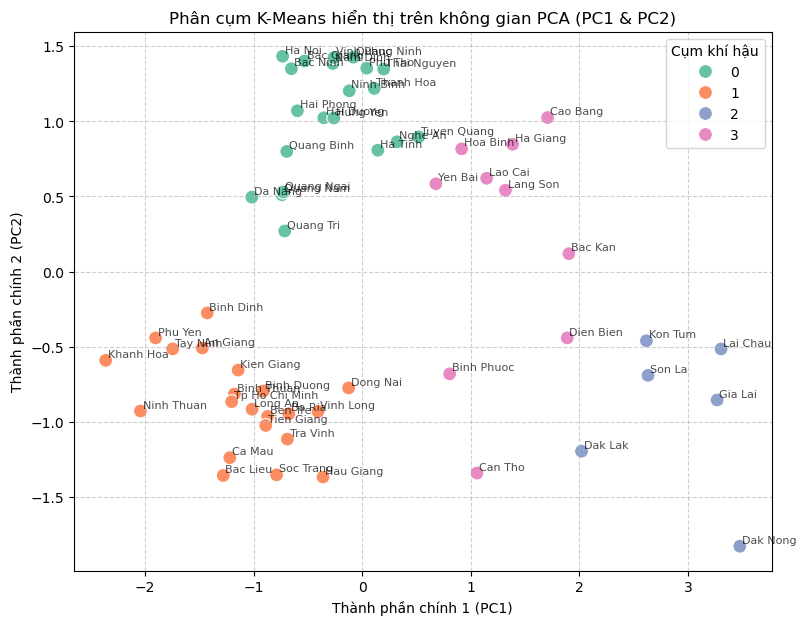

In [33]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# --- Giảm chiều dữ liệu 3D xuống 2D bằng PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

province_avg['PC1'] = pca_result[:, 0]
province_avg['PC2'] = pca_result[:, 1]

# --- Vẽ biểu đồ PCA 2D ---
plt.figure(figsize=(9,7))
sns.scatterplot(
    data=province_avg,
    x='PC1', y='PC2',
    hue='Cluster', palette='Set2', s=100
)

# Hiển thị nhãn tỉnh (nếu muốn)
for i in range(province_avg.shape[0]):
    plt.text(
        province_avg['PC1'][i]+0.02, 
        province_avg['PC2'][i]+0.02,
        province_avg['province'][i],
        fontsize=8, alpha=0.7
    )

plt.title('Phân cụm K-Means hiển thị trên không gian PCA (PC1 & PC2)')
plt.xlabel('Thành phần chính 1 (PC1)')
plt.ylabel('Thành phần chính 2 (PC2)')
plt.legend(title='Cụm khí hậu')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Mục đích của biểu đồ

- Trực quan hóa kết quả phân cụm K-Means trên không gian giảm chiều PCA.

- Đánh giá độ tách biệt giữa các cụm khí hậu dựa trên 3 đặc trưng chính.

- Xác định tính hợp lý của số cụm và quan sát ranh giới giữa các vùng khí hậu.

- Hỗ trợ giải thích đặc trưng của từng cụm theo nhiệt độ – độ ẩm – lượng mưa.

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# ============================
# 1) ĐỌC DỮ LIỆU & LẤY 3 TRƯỜNG
# ============================
data = pd.read_csv('Data/data_cleanned.csv')
province_avg = data.groupby('province')[['temperature', 'humidity', 'precipitation']].mean().reset_index()

# Chọn đặc trưng
features = ['temperature', 'humidity', 'precipitation']
X = province_avg[features]

# ============================
# 2) CHUẨN HÓA DỮ LIỆU
# ============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================
# 3) PCA 2 THÀNH PHẦN
# ============================
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

province_avg['PC1'] = pca_result[:, 0]
province_avg['PC2'] = pca_result[:, 1]

# ============================
# 4) LOADINGS – XÁC ĐỊNH PC1 & PC2 ĐẠI DIỆN CHO GÌ
# ============================
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)

print("===== ẢNH HƯỞNG CỦA TỪNG BIẾN LÊN PC1 & PC2 =====")
print(loadings)

# Top biến ảnh hưởng mạnh nhất lên PC1 & PC2
for i in range(2):
    print(f"\n--- Top biến ảnh hưởng mạnh nhất đến PC{i+1} ---")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(3))

===== ẢNH HƯỞNG CỦA TỪNG BIẾN LÊN PC1 & PC2 =====
                    PC1       PC2
temperature   -0.677245  0.253602
humidity       0.696879 -0.080008
precipitation  0.236004  0.963994

--- Top biến ảnh hưởng mạnh nhất đến PC1 ---
humidity         0.696879
temperature      0.677245
precipitation    0.236004
Name: PC1, dtype: float64

--- Top biến ảnh hưởng mạnh nhất đến PC2 ---
precipitation    0.963994
temperature      0.253602
humidity         0.080008
Name: PC2, dtype: float64


PC1: Trục nhiệt–ẩm

PC2: Trục lượng mưa

In [79]:
# --- Import thư viện ---
import pandas as pd
import folium

# ================================================================
#  HÀM CHUẨN HÓA TÊN TỈNH
# ================================================================
def normalize_province(name):
    """Chuẩn hóa tên tỉnh từ dữ liệu Kaggle"""
    name = name.strip().title().replace('_', ' ')
    # Cắt phần sau dấu gạch (VD: "Nghe An-Vinh" -> "Nghe An")
    if '-' in name:
        name = name.split('-')[0].strip()
    # Chuẩn hóa các tên đặc biệt
    mapping = {
        'Tp Ho Chi Minh': 'Ho Chi Minh',
        'Ba Ria': 'Ba Ria-Vung Tau'
    }
    return mapping.get(name, name)

province_avg['province'] = province_avg['province'].apply(normalize_province)

# ================================================================
#  BẢNG TỌA ĐỘ 63 TỈNH/THÀNH CẬP NHẬT
# ================================================================
coords = {
    'Ha Noi': [21.0278, 105.8342],
    'Ha Giang': [22.8233, 104.9836],
    'Cao Bang': [22.6667, 106.25],
    'Bac Kan': [22.1333, 105.8333],
    'Lang Son': [21.8453, 106.7570],
    'Tuyen Quang': [21.8167, 105.2167],
    'Lao Cai': [22.4833, 103.95],
    'Yen Bai': [21.7167, 104.9],
    'Thai Nguyen': [21.6, 105.85],
    'Phu Tho': [21.3333, 105.2167],
    'Bac Giang': [21.2735, 106.1940],
    'Quang Ninh': [21.0064, 107.2925],
    'Bac Ninh': [21.1861, 106.0763],
    'Hai Duong': [20.9397, 106.3306],
    'Hai Phong': [20.8449, 106.6881],
    'Hung Yen': [20.6464, 106.0511],
    'Hoa Binh': [20.8172, 105.3376],
    'Ha Nam': [20.5411, 105.9122],
    'Nam Dinh': [20.4333, 106.1667],
    'Thai Binh': [20.45, 106.34],
    'Ninh Binh': [20.2539, 105.9750],
    'Thanh Hoa': [19.8067, 105.7850],
    'Nghe An': [18.6735, 105.6923],
    'Ha Tinh': [18.3428, 105.9057],
    'Quang Binh': [17.4833, 106.6],
    'Quang Tri': [16.75, 107.2],
    'Thua Thien Hue': [16.4674, 107.5905],
    'Da Nang': [16.0544, 108.2022],
    'Quang Nam': [15.5394, 108.0191],
    'Quang Ngai': [15.1205, 108.7923],
    'Binh Dinh': [13.7820, 109.2190],
    'Phu Yen': [13.0882, 109.0929],
    'Khanh Hoa': [12.2585, 109.0526],
    'Ninh Thuan': [11.5670, 108.9830],
    'Binh Thuan': [10.9804, 108.2615],
    'Kon Tum': [14.3500, 108.0000],
    'Gia Lai': [13.9833, 108.0000],
    'Dak Lak': [12.7100, 108.2378],
    'Dak Nong': [12.1667, 107.6667],
    'Lam Dong': [11.9404, 108.4583],
    'Binh Phuoc': [11.7512, 106.7235],
    'Tay Ninh': [11.3100, 106.1000],
    'Binh Duong': [11.1735, 106.7055],
    'Dong Nai': [10.9453, 106.8247],
    'Ba Ria-Vung Tau': [10.5417, 107.2429],
    'Ho Chi Minh': [10.7769, 106.7009],
    'Long An': [10.6956, 106.2430],
    'Tien Giang': [10.4493, 106.3420],
    'Ben Tre': [10.2415, 106.3753],
    'Tra Vinh': [9.9347, 106.3453],
    'Vinh Long': [10.2560, 105.9590],
    'Dong Thap': [10.4800, 105.6360],
    'An Giang': [10.3759, 105.4185],
    'Kien Giang': [10.0125, 105.0809],
    'Can Tho': [10.0452, 105.7469],
    'Hau Giang': [9.7840, 105.4700],
    'Soc Trang': [9.6037, 105.9803],
    'Bac Lieu': [9.2940, 105.7278],
    'Ca Mau': [9.1768, 105.1524],
    'Dien Bien': [21.3833, 103.0167],
    'Lai Chau': [22.3964, 103.4580],
    'Son La': [21.3274, 103.9144],
    'Vinh Phuc': [21.3090, 105.6049]
}

# --- Tạo DataFrame từ dict trên ---
coords_df = pd.DataFrame([(k, v[0], v[1]) for k, v in coords.items()],
                         columns=['province', 'lat', 'lon'])

# --- Kiểm tra ---
print(coords_df.head())
print(f"Số tỉnh có tọa độ: {len(coords_df)}")

# ================================================================
#  GỘP DỮ LIỆU VÀO PROVINCE_AVG
# ================================================================
province_avg = province_avg.merge(coords_df, on='province', how='left')

# Kiểm tra lại
missing_coords = province_avg[province_avg['lat'].isna()]
if len(missing_coords) > 0:
    print(" Các tỉnh chưa có tọa độ:")
    display(missing_coords[['province']])
else:
    print(" Tất cả 63 tỉnh/thành đã có tọa độ.")

# ================================================================
#  VẼ BẢN ĐỒ FOLIUM
# ================================================================
m = folium.Map(location=[16.0, 107.5], zoom_start=5.5, tiles='CartoDB positron')

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

for i, row in province_avg.iterrows():
    cluster_id = int(row['Cluster'])
    color = colors[cluster_id % len(colors)]
    
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.9,
        popup=f"{row['province']} - Cụm {cluster_id}"
    ).add_to(m)

# ================================================================
#  THÊM CHÚ THÍCH
# ================================================================
legend_html = """
<div style="position: fixed; 
     bottom: 40px; left: 40px; width: 260px; height: 135px; 
     background-color: white; border:2px solid grey; z-index:9999; font-size:13px;">
&nbsp;<b>🌦️ Chú thích cụm khí hậu</b><br>
&nbsp;<i style="color:#66c2a5;">●</i> Cụm 0: Đồng bằng Bắc Bộ & Bắc Trung Bộ<br>
&nbsp;<i style="color:#fc8d62;">●</i> Cụm 1: Duyên hải Nam Trung Bộ & Nam Bộ<br>
&nbsp;<i style="color:#8da0cb;">●</i> Cụm 2: Vùng cao - Tây Nguyên<br>
&nbsp;<i style="color:#e78ac3;">●</i> Cụm 3: Trung du & miền núi Bắc Bộ
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# ================================================================
#  HIỂN THỊ / LƯU BẢN ĐỒ
# ================================================================
m.save("ban_do_cum_khi_hau_vn.html")
m

   province      lat       lon
0    Ha Noi  21.0278  105.8342
1  Ha Giang  22.8233  104.9836
2  Cao Bang  22.6667  106.2500
3   Bac Kan  22.1333  105.8333
4  Lang Son  21.8453  106.7570
Số tỉnh có tọa độ: 63
 Tất cả 63 tỉnh/thành đã có tọa độ.


Mục đích của biểu đồ

- Kiểm chứng tính hợp lý về mặt không gian địa lý của các cụm khí hậu sau khi phân cụm.

- Trực quan hóa rõ ràng sự phân bố các cụm trên bản đồ Việt Nam.

- Giúp đối chiếu kết quả mô hình với địa hình – khí hậu thực tế để đánh giá độ chính xác.

- Hỗ trợ nhận diện từng vùng khí hậu phục vụ phân tích, báo cáo và ứng dụng thực tiễn.

In [80]:
# --- BẢNG KHUYẾN NGHỊ ỨNG DỤNG THEO CỤM KHÍ HẬU (CẬP NHẬT THEO 4 VÙNG) ---

def get_recommendations(cluster_id):
    """Sinh khuyến nghị theo 4 vùng khí hậu Việt Nam"""
    
    if cluster_id == 0:
        return {
            "Khu vực": "Đồng bằng Bắc Bộ & Bắc Trung Bộ",
            "Khí hậu": "Nhiệt độ ôn hòa, có mùa đông rõ rệt; độ ẩm cao; mưa tập trung theo mùa.",
            "Nông nghiệp": "Phù hợp trồng lúa nước, rau màu vụ đông, cây ăn quả ôn đới (cam, bưởi, vải).",
            "Du lịch": "Phát triển du lịch văn hóa, di tích lịch sử, lễ hội truyền thống (Hà Nội, Ninh Bình, Thanh Hóa).",
            "Năng lượng": "Khuyến khích điện mặt trời mái nhà và tiết kiệm năng lượng trong đô thị.",
            "Quản lý đô thị": "Tăng cường quy hoạch chống ngập, kiểm soát ô nhiễm và phát triển cây xanh đô thị."
        }

    elif cluster_id == 1:
        return {
            "Khu vực": "Duyên hải Nam Trung Bộ & Nam Bộ",
            "Khí hậu": "Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa phân bố rõ rệt theo mùa.",
            "Nông nghiệp": "Phù hợp cây công nghiệp ngắn ngày và cây chịu hạn (điều, mía, thanh long).",
            "Du lịch": "Phát triển du lịch biển – đảo, nghỉ dưỡng, thể thao nước (Đà Nẵng, Nha Trang, Phú Quốc).",
            "Năng lượng": "Rất tiềm năng cho điện gió và điện mặt trời ven biển.",
            "Quản lý đô thị": "Cần chú trọng hạ tầng chống xâm nhập mặn, bão lũ và phát triển ven biển bền vững."
        }

    elif cluster_id == 2:
        return {
            "Khu vực": "Vùng cao Tây Nguyên",
            "Khí hậu": "Mát mẻ quanh năm, độ ẩm cao, có mùa mưa rõ rệt, địa hình cao nguyên.",
            "Nông nghiệp": "Thích hợp cây công nghiệp dài ngày: cà phê, hồ tiêu, chè, cao su.",
            "Du lịch": "Phát triển du lịch sinh thái, khám phá, văn hóa bản địa (Đà Lạt, Pleiku, Buôn Ma Thuột).",
            "Năng lượng": "Thuận lợi phát triển thủy điện nhỏ và năng lượng gió.",
            "Quản lý đô thị": "Bảo vệ rừng đầu nguồn, hạn chế xói mòn đất và phát triển đô thị sinh thái."
        }

    elif cluster_id == 3:
        return {
            "Khu vực": "Trung du & miền núi Bắc Bộ",
            "Khí hậu": "Khá mát mẻ, độ ẩm cao, lượng mưa lớn, địa hình đồi núi xen kẽ thung lũng.",
            "Nông nghiệp": "Phù hợp cây lâm nghiệp, cây ăn quả vùng cao (chè, mận, cam, quýt).",
            "Du lịch": "Phát triển du lịch sinh thái, khám phá núi rừng (Sa Pa, Hà Giang, Mộc Châu).",
            "Năng lượng": "Tiềm năng điện gió và thủy điện khu vực đồi núi.",
            "Quản lý đô thị": "Tập trung phát triển giao thông miền núi và bảo vệ rừng đặc dụng."
        }

    else:
        return {
            "Khu vực": "Không xác định",
            "Khí hậu": "Dữ liệu không đủ để xác định vùng khí hậu.",
            "Nông nghiệp": "Cần khảo sát thêm để xác định mô hình nông nghiệp phù hợp.",
            "Du lịch": "Chưa đủ dữ liệu đặc trưng để đánh giá.",
            "Năng lượng": "Chưa có dữ liệu khí tượng chi tiết.",
            "Quản lý đô thị": "Chưa xác định được chiến lược phù hợp."
        }

# --- ÁP DỤNG CHO TOÀN BỘ DỮ LIỆU ---
recommendations = province_avg['Cluster'].apply(get_recommendations)
recommendations_df = pd.DataFrame(recommendations.tolist())

# Gộp với dữ liệu cụm & tỉnh
province_recommend = pd.concat([province_avg[['province', 'Cluster']], recommendations_df], axis=1)

# --- HIỂN THỊ MẪU ---
print("🎯 Gợi ý phát triển theo từng cụm khí hậu:")
display(province_recommend.head(10))

🎯 Gợi ý phát triển theo từng cụm khí hậu:


,province,Cluster,Khu vực,Khí hậu,Nông nghiệp,Du lịch,Năng lượng,Quản lý đô thị
0,An Giang,1,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
1,Ba Ria-Vung Tau,1,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
2,Bac Giang,0,Đồng bằng Bắc Bộ & Bắc Trung Bộ,"Nhiệt độ ôn hòa, có mùa đông rõ rệt; độ ẩm cao...","Phù hợp trồng lúa nước, rau màu vụ đông, cây ă...","Phát triển du lịch văn hóa, di tích lịch sử, l...",Khuyến khích điện mặt trời mái nhà và tiết kiệ...,"Tăng cường quy hoạch chống ngập, kiểm soát ô n..."
3,Bac Kan,3,Trung du & miền núi Bắc Bộ,"Khá mát mẻ, độ ẩm cao, lượng mưa lớn, địa hình...","Phù hợp cây lâm nghiệp, cây ăn quả vùng cao (c...","Phát triển du lịch sinh thái, khám phá núi rừn...",Tiềm năng điện gió và thủy điện khu vực đồi núi.,Tập trung phát triển giao thông miền núi và bả...
4,Bac Lieu,1,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
5,Bac Ninh,0,Đồng bằng Bắc Bộ & Bắc Trung Bộ,"Nhiệt độ ôn hòa, có mùa đông rõ rệt; độ ẩm cao...","Phù hợp trồng lúa nước, rau màu vụ đông, cây ă...","Phát triển du lịch văn hóa, di tích lịch sử, l...",Khuyến khích điện mặt trời mái nhà và tiết kiệ...,"Tăng cường quy hoạch chống ngập, kiểm soát ô n..."
6,Ben Tre,1,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
7,Binh Dinh,1,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
8,Binh Duong,1,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
9,Binh Phuoc,3,Trung du & miền núi Bắc Bộ,"Khá mát mẻ, độ ẩm cao, lượng mưa lớn, địa hình...","Phù hợp cây lâm nghiệp, cây ăn quả vùng cao (c...","Phát triển du lịch sinh thái, khám phá núi rừn...",Tiềm năng điện gió và thủy điện khu vực đồi núi.,Tập trung phát triển giao thông miền núi và bả...


In [81]:
# ================================================================
#  KẾT HỢP DỮ LIỆU PHÂN CỤM + KHUYẾN NGHỊ
# ================================================================
province_map = province_avg.merge(province_recommend, on=['province', 'Cluster'], how='left')

# ================================================================
#  KHỞI TẠO BẢN ĐỒ FOLIUM
# ================================================================
import folium

m = folium.Map(location=[16.0, 107.5], zoom_start=5.5, tiles='CartoDB positron')
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# ===============================================================
#  THÊM CÁC TỈNH LÊN BẢN ĐỒ
# ================================================================
for _, row in province_map.iterrows():
    cluster_id = int(row['Cluster'])
    color = colors[cluster_id % len(colors)]
    
    # Tạo nội dung popup: hiển thị khuyến nghị chi tiết
    popup_html = f"""
    <b>{row['province']}</b> - <i>Cụm {cluster_id}</i><br>
    <b>Vùng khí hậu:</b> {row['Khu vực']}<br>
    <b>Khí hậu:</b> {row['Khí hậu']}<br><br>
    <b>🌾 Nông nghiệp:</b> {row['Nông nghiệp']}<br>
    <b>🏖️ Du lịch:</b> {row['Du lịch']}<br>
    <b>⚡ Năng lượng:</b> {row['Năng lượng']}<br>
    <b>🏙️ Quản lý đô thị:</b> {row['Quản lý đô thị']}
    """

    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=6,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.9,
        popup=folium.Popup(popup_html, max_width=350, min_width=250)
    ).add_to(m)

# ================================================================
#  THÊM CHÚ THÍCH CỤM KHÍ HẬU
# ================================================================
legend_html = """
<div style="position: fixed; 
     bottom: 40px; left: 40px; width: 290px; height: 150px; 
     background-color: white; border:2px solid grey; 
     z-index:9999; font-size:13px; padding:5px;">
<b>🌦️ Chú thích cụm khí hậu</b><br>
<i style="color:#66c2a5;">●</i> Cụm 0: Đồng bằng Bắc Bộ & Bắc Trung Bộ<br>
<i style="color:#fc8d62;">●</i> Cụm 1: Duyên hải Nam Trung Bộ & Nam Bộ<br>
<i style="color:#8da0cb;">●</i> Cụm 2: Vùng cao - Tây Nguyên<br>
<i style="color:#e78ac3;">●</i> Cụm 3: Trung du & miền núi Bắc Bộ
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# ================================================================
#  LƯU & HIỂN THỊ BẢN ĐỒ
# ================================================================
m.save("ban_do_goi_y_khi_hau.html")
m

# Lưu dữ liệu đã huấn luyện

In [88]:
# ================================================================
# 1️⃣ Giảm chiều PCA để trực quan hóa (2 thành phần PC1, PC2)
# ================================================================
from sklearn.decomposition import PCA

# Chỉ cần chạy nếu bạn chưa có PC1, PC2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
province_avg['PC1'] = pca_result[:, 0]
province_avg['PC2'] = pca_result[:, 1]

# ================================================================
# 2️⃣ GỘP DỮ LIỆU PHÂN CỤM + GỢI Ý
# ================================================================
province_final = province_avg.merge(province_recommend, on=['province', 'Cluster'], how='left')

# ================================================================
# 3️⃣ SẮP XẾP CÁC CỘT THEO TRÌNH TỰ HỢP LÝ
# ================================================================
province_final = province_final[[
    'province', 'Cluster',
    'temperature', 'humidity', 'precipitation',
    'PC1', 'PC2',
    'Khu vực', 'Khí hậu',
    'Nông nghiệp', 'Du lịch', 'Năng lượng', 'Quản lý đô thị'
]]

# ================================================================
# 4️⃣ HIỂN THỊ MẪU KẾT QUẢ
# ================================================================
print("📊 Bảng kết quả phân cụm + PCA + gợi ý phát triển:")
display(province_final.head(10))

# ================================================================
# 5️⃣ LƯU KẾT QUẢ RA FILE CSV
# ================================================================
province_final.to_csv("Data/vietnam_weather_clusters.csv", index=False, encoding='utf-8-sig')
print("Đã lưu file: vietnam_weather_clusters.csv")

📊 Bảng kết quả phân cụm + PCA + gợi ý phát triển:


,province,Cluster,temperature,humidity,precipitation,PC1,PC2,Khu vực,Khí hậu,Nông nghiệp,Du lịch,Năng lượng,Quản lý đô thị
0,An Giang,1,28.371853,76.198132,0.145647,-1.472608,-0.508681,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
1,Ba Ria-Vung Tau,1,27.689369,80.108852,0.110520,-0.674884,-0.946449,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
2,Bac Giang,0,28.090516,78.462884,0.406353,-0.530053,1.402137,Đồng bằng Bắc Bộ & Bắc Trung Bộ,"Nhiệt độ ôn hòa, có mùa đông rõ rệt; độ ẩm cao...","Phù hợp trồng lúa nước, rau màu vụ đông, cây ă...","Phát triển du lịch văn hóa, di tích lịch sử, l...",Khuyến khích điện mặt trời mái nhà và tiết kiệ...,"Tăng cường quy hoạch chống ngập, kiểm soát ô n..."
3,Bac Kan,3,25.464591,88.796678,0.313000,1.902917,0.119199,Trung du & miền núi Bắc Bộ,"Khá mát mẻ, độ ẩm cao, lượng mưa lớn, địa hình...","Phù hợp cây lâm nghiệp, cây ăn quả vùng cao (c...","Phát triển du lịch sinh thái, khám phá núi rừn...",Tiềm năng điện gió và thủy điện khu vực đồi núi.,Tập trung phát triển giao thông miền núi và bả...
4,Bac Lieu,1,27.982693,77.689609,0.045500,-1.279562,-1.357608,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
5,Bac Ninh,0,28.520091,78.951161,0.392371,-0.652463,1.350570,Đồng bằng Bắc Bộ & Bắc Trung Bộ,"Nhiệt độ ôn hòa, có mùa đông rõ rệt; độ ẩm cao...","Phù hợp trồng lúa nước, rau màu vụ đông, cây ă...","Phát triển du lịch văn hóa, di tích lịch sử, l...",Khuyến khích điện mặt trời mái nhà và tiết kiệ...,"Tăng cường quy hoạch chống ngập, kiểm soát ô n..."
6,Ben Tre,1,27.898144,79.455824,0.102631,-0.871404,-0.964372,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
7,Binh Dinh,1,28.145803,75.493802,0.178944,-1.427497,-0.275557,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
8,Binh Duong,1,28.328452,80.129537,0.117910,-0.911255,-0.795481,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."
9,Binh Phuoc,3,26.918155,87.047060,0.176012,0.805221,-0.681280,Trung du & miền núi Bắc Bộ,"Khá mát mẻ, độ ẩm cao, lượng mưa lớn, địa hình...","Phù hợp cây lâm nghiệp, cây ăn quả vùng cao (c...","Phát triển du lịch sinh thái, khám phá núi rừn...",Tiềm năng điện gió và thủy điện khu vực đồi núi.,Tập trung phát triển giao thông miền núi và bả...


Đã lưu file: vietnam_weather_clusters.csv


# Mô hình gợi ý

In [89]:
import pandas as pd

# Load dữ liệu (thay bằng đường dẫn file của bạn)
data = pd.read_csv("Data/vietnam_weather_clusters.csv")

# Hàm gợi ý theo province
def recommend_by_province(province_name):
    rec = data[data['province'].str.contains(province_name, case=False, na=False)]
    if rec.empty:
        return f"Không tìm thấy thông tin cho {province_name}"
    else:
        return rec[['province','temperature','humidity','precipitation','Khu vực', 'Khí hậu',
    'Nông nghiệp', 'Du lịch', 'Năng lượng', 'Quản lý đô thị']]

# Ví dụ test
recommend_by_province("An Giang")


,province,temperature,humidity,precipitation,Khu vực,Khí hậu,Nông nghiệp,Du lịch,Năng lượng,Quản lý đô thị
0,An Giang,28.371853,76.198132,0.145647,Duyên hải Nam Trung Bộ & Nam Bộ,"Nhiệt độ cao quanh năm, độ ẩm trung bình, mưa ...",Phù hợp cây công nghiệp ngắn ngày và cây chịu ...,"Phát triển du lịch biển – đảo, nghỉ dưỡng, thể...",Rất tiềm năng cho điện gió và điện mặt trời ve...,"Cần chú trọng hạ tầng chống xâm nhập mặn, bão ..."


In [91]:
# Hàm gợi ý theo Cluster
def recommend_by_cluster(cluster_number):
    rec = data[data['Cluster'] == cluster_number]
    if rec.empty:
        return f"Không tìm thấy thông tin cho Cluster {cluster_number}"
    else:
        return rec[['province', 'temperature','humidity','precipitation','Khu vực', 'Khí hậu',
    'Nông nghiệp', 'Du lịch', 'Năng lượng', 'Quản lý đô thị']]

# Ví dụ test
recommend_by_cluster(2)

,province,temperature,humidity,precipitation,Khu vực,Khí hậu,Nông nghiệp,Du lịch,Năng lượng,Quản lý đô thị
15,Dak Lak,24.224309,88.168119,0.163478,Vùng cao Tây Nguyên,"Mát mẻ quanh năm, độ ẩm cao, có mùa mưa rõ rệt...","Thích hợp cây công nghiệp dài ngày: cà phê, hồ...","Phát triển du lịch sinh thái, khám phá, văn hó...",Thuận lợi phát triển thủy điện nhỏ và năng lượ...,"Bảo vệ rừng đầu nguồn, hạn chế xói mòn đất và ..."
16,Dak Nong,21.671281,91.426158,0.137719,Vùng cao Tây Nguyên,"Mát mẻ quanh năm, độ ẩm cao, có mùa mưa rõ rệt...","Thích hợp cây công nghiệp dài ngày: cà phê, hồ...","Phát triển du lịch sinh thái, khám phá, văn hó...",Thuận lợi phát triển thủy điện nhỏ và năng lượ...,"Bảo vệ rừng đầu nguồn, hạn chế xói mòn đất và ..."
19,Gia Lai,22.294044,90.282272,0.250450,Vùng cao Tây Nguyên,"Mát mẻ quanh năm, độ ẩm cao, có mùa mưa rõ rệt...","Thích hợp cây công nghiệp dài ngày: cà phê, hồ...","Phát triển du lịch sinh thái, khám phá, văn hó...",Thuận lợi phát triển thủy điện nhỏ và năng lượ...,"Bảo vệ rừng đầu nguồn, hạn chế xói mòn đất và ..."
30,Kon Tum,23.626566,89.186301,0.273712,Vùng cao Tây Nguyên,"Mát mẻ quanh năm, độ ẩm cao, có mùa mưa rõ rệt...","Thích hợp cây công nghiệp dài ngày: cà phê, hồ...","Phát triển du lịch sinh thái, khám phá, văn hó...",Thuận lợi phát triển thủy điện nhỏ và năng lượ...,"Bảo vệ rừng đầu nguồn, hạn chế xói mòn đất và ..."
31,Lai Chau,21.914973,88.932663,0.299228,Vùng cao Tây Nguyên,"Mát mẻ quanh năm, độ ẩm cao, có mùa mưa rõ rệt...","Thích hợp cây công nghiệp dài ngày: cà phê, hồ...","Phát triển du lịch sinh thái, khám phá, văn hó...",Thuận lợi phát triển thủy điện nhỏ và năng lượ...,"Bảo vệ rừng đầu nguồn, hạn chế xói mòn đất và ..."
47,Son La,23.362986,88.910754,0.248058,Vùng cao Tây Nguyên,"Mát mẻ quanh năm, độ ẩm cao, có mùa mưa rõ rệt...","Thích hợp cây công nghiệp dài ngày: cà phê, hồ...","Phát triển du lịch sinh thái, khám phá, văn hó...",Thuận lợi phát triển thủy điện nhỏ và năng lượ...,"Bảo vệ rừng đầu nguồn, hạn chế xói mòn đất và ..."


# Tạo website hiển thị kết quả huấn luyện qua StreamLit

In [2]:
# Tạo file app.py từ Jupyter
code = """
import streamlit as st
import pandas as pd
import pydeck as pdk # Import thư viện pydeck để tạo bản đồ tùy chỉnh với tooltip

# MÀU SẮC CHO PHÂN CỤM (RGBA) - ĐÃ CẬP NHẬT 4 CỤM (0, 1, 2, 3)
CLUSTER_COLORS = {
    0: [31, 119, 180, 200],  # Blue - Đồng bằng Bắc Bộ & Bắc Trung Bộ
    1: [255, 127, 14, 200],  # Orange - Duyên hải Nam Trung Bộ & Nam Bộ
    2: [44, 160, 44, 200],   # Green - Vùng cao - Tây Nguyên
    3: [214, 39, 40, 200],   # Red - Trung du & miền núi Bắc Bộ
}
VIETNAM_CENTER = (16.0, 107.5) # Trung tâm Việt Nam để hiển thị tổng quan

# ==== DỮ LIỆU TỌA ĐỘ MASTER (63 TỈNH/THÀNH PHỐ) - GIỮ NGUYÊN ====
MASTER_COORDS = {
    'Ha Noi': [21.0278, 105.8342], 'Ha Giang': [22.8233, 104.9836], 'Cao Bang': [22.6667, 106.25], 
    'Bac Kan': [22.1333, 105.8333], 'Lang Son': [21.8453, 106.7570], 'Tuyen Quang': [21.8167, 105.2167], 
    'Lao Cai': [22.4833, 103.95], 'Yen Bai': [21.7167, 104.9], 'Thai Nguyen': [21.6, 105.85], 
    'Phu Tho': [21.3333, 105.2167], 'Bac Giang': [21.2735, 106.1940], 'Quang Ninh': [21.0064, 107.2925], 
    'Bac Ninh': [21.1861, 106.0763], 'Hai Duong': [20.9397, 106.3306], 'Hai Phong': [20.8449, 106.6881], 
    'Hung Yen': [20.6464, 106.0511], 'Hoa Binh': [20.8172, 105.3376], 'Ha Nam': [20.5411, 105.9122], 
    'Nam Dinh': [20.4333, 106.1667], 'Thai Binh': [20.45, 106.34], 'Ninh Binh': [20.2539, 105.9750], 
    'Thanh Hoa': [19.8067, 105.7850], 'Nghe An': [18.6735, 105.6923], 'Ha Tinh': [18.3428, 105.9057], 
    'Quang Binh': [17.4833, 106.6], 'Quang Tri': [16.75, 107.2], 'Thua Thien Hue': [16.4674, 107.5905], 
    'Da Nang': [16.0544, 108.2022], 'Quang Nam': [15.5394, 108.0191], 'Quang Ngai': [15.1205, 108.7923], 
    'Binh Dinh': [13.7820, 109.2190], 'Phu Yen': [13.0882, 109.0929], 'Khanh Hoa': [12.2585, 109.0526], 
    'Ninh Thuan': [11.5670, 108.9830], 'Binh Thuan': [10.9804, 108.2615], 'Kon Tum': [14.3500, 108.0000], 
    'Gia Lai': [13.9833, 108.0000], 'Dak Lak': [12.7100, 108.2378], 'Dak Nong': [12.1667, 107.6667], 
    'Lam Dong': [11.9404, 108.4583], 'Binh Phuoc': [11.7512, 106.7235], 'Tay Ninh': [11.3100, 106.1000], 
    'Binh Duong': [11.1735, 106.7055], 'Dong Nai': [10.9453, 106.8247], 'Ba Ria-Vung Tau': [10.5417, 107.2429], 
    'Ho Chi Minh': [10.7769, 106.7009], 'Long An': [10.6956, 106.2430], 'Tien Giang': [10.4493, 106.3420], 
    'Ben Tre': [10.2415, 106.3753], 'Tra Vinh': [9.9347, 106.3453], 'Vinh Long': [10.2560, 105.9590], 
    'Dong Thap': [10.4800, 105.6360], 'An Giang': [10.3759, 105.4185], 'Kien Giang': [10.0125, 105.0809], 
    'Can Tho': [10.0452, 105.7469], 'Hau Giang': [9.7840, 105.4700], 'Soc Trang': [9.6037, 105.9803], 
    'Bac Lieu': [9.2940, 105.7278], 'Ca Mau': [9.1768, 105.1524], 'Dien Bien': [21.3833, 103.0167], 
    'Lai Chau': [22.3964, 103.4580], 'Son La': [21.3274, 103.9144], 'Vinh Phuc': [21.3090, 105.6049]
}

# ==== HÀM CHUYỂN ĐỔI KHÔNG DẤU -> CÓ DẤU (VIETNAMESE UNICODE) ====
def convert_to_vietnamese(text):
    if not isinstance(text, str):
        return text

    # Danh sách từ khóa thay thế (Đã mở rộng và tối ưu hóa)
    replacements = {
        # Nông nghiệp
        "Lua gao": "Lúa gạo", "Thuy san": "Thủy sản", "Cay cong nghiep": "Cây công nghiệp",
        "ca phe": "cà phê", "ho tieu": "hồ tiêu", "Lam nghiep": "Lâm nghiệp",  
        "cay an trai": "cây ăn trái", "rau mau": "rau màu", "chan nuoi": "chăn nuôi",
        "nong san": "nông sản", "nong thon": "nông thôn", "phu pham": "phụ phẩm",
        "thuong hieu": "thương hiệu", "khoai mi": "khoai mì", "mien vuon": "miền vườn",
        "ruong bac thang": "ruộng bậc thang", "tom": "tôm", "ca tra/basa": "cá tra/basa",
        "luong thuc": "lương thực", "thu hai": "thu hoạch", "ngan ngay": "ngắn ngày",
        "ngu coc": "ngũ cốc", "dac san": "đặc sản", "tieu dung": "tiêu dùng",
        "che": "chè", "thao duoc": "thảo dược", "mia": "mía", "thuoc la": "thuốc lá",
        "cong nghe cao": "công nghệ cao", "lien ket": "liên kết", "san xuat": "sản xuất",
        "ben vung": "bền vững", "dat dai": "đất đai", "chat luong": "chất lượng",

        # Du lịch
        "Du lich": "Du lịch", "Sinh thai": "Sinh thái", "Van hoa": "Văn hóa", 
        "Kham pha": "Khám phá", "Lich su": "Lịch sử", "Bien": "Biển", "Nghi duong": "Nghỉ dưỡng",
        "do thi": "đô thị", "mien nui": "miền núi", "di san": "di sản",
        "am thuc": "ẩm thực", "tam linh": "tâm linh", "song nuoc": "sông nước",
        "lang nghe": "làng nghề", "mua nuoc noi": "mùa nước nổi", "long lanh": "long lanh",
        "khai thac": "khai thác", "bien dao": "biển đảo", "truyen thong": "truyền thống",
        "di tich": "di tích", "sinh thai": "sinh thái", "bien gioi": "biên giới",
        "bien vung": "biển vùng", "am thuc": "ẩm thực", "trekking": "trekking",

        # Năng lượng
        "Dien mat troi": "Điện mặt trời", "Dien gio": "Điện gió", "Thuy dien": "Thủy điện", 
        "Sinh khoi": "Sinh khối", "ap mai": "áp mái", "than nhiet": "than nhiệt",
        "tiem nang lon": "tiềm năng lớn", "nang luong": "năng lượng", "phat dien": "phát điện",
        "tich tru": "tích trữ", "hieu qua": "hiệu quả", "su dung": "sử dụng",

        # Quản lý & Đô thị
        "Quan ly": "Quản lý", "Kiem soat": "Kiểm soát", "Phat trien": "Phát triển", 
        "Chong ngap lut": "Chống ngập lụt", "Quy hoach": "Quy hoạch", "thuy loi": "thủy lợi",
        "giao thong": "giao thông", "ha tang": "hạ tầng", "chat thai": "chất thải", 
        "rung": "rừng", "ngap lut": "ngập lụt", 
        "xam nhap man": "xâm nhập mặn", "xa lo": "xói lở", "Dat Mui": "Đất Mũi", 
        "Chinh trang": "Chỉnh trang", "bao ve": "bảo vệ", "lien tinh": "liên tỉnh",
        "duong thuy": "đường thủy", "bao ton": "bảo tồn", "canh quan": "cảnh quan",
        "lien khu vuc": "liên khu vực", "chu dong": "chủ động", "moi truong": "môi trường",
        "tai nguyen": "tài nguyên", "xay dung": "xây dựng", "vung dem": "vùng đệm",
        "khu dan cu": "khu dân cư", "phong chong": "phòng chống",
        "dat dai": "đất đai", "su dung": "sử dụng", "do thi hoa": "đô thị hóa",
        "bien doi khi hau": "biến đổi khí hậu"
    }
    
    # Thực hiện thay thế
    text_out = text
    for non_accent, accent in replacements.items():
        # Thay thế từ không dấu viết thường
        text_out = text_out.replace(non_accent, accent)
        # Thay thế từ không dấu viết hoa ở đầu câu/từ (Xam nhap man -> Xâm nhập mặn)
        capitalized_non_accent = non_accent[0].upper() + non_accent[1:]
        capitalized_accent = accent[0].upper() + accent[1:]
        text_out = text_out.replace(capitalized_non_accent, capitalized_accent)
    
    # Đảm bảo loại bỏ khoảng trắng thừa
    return text_out.strip().replace("  ", " ")

# ==== HÀM GỢI Ý KHU VỰC CỤM - ĐÃ CẬP NHẬT 4 CỤM ====
def get_cluster_area(cluster_id):
    # Gợi ý phân cụm dựa trên các yếu tố chính (PC1/PC2) 
    areas = {
        0: "Đồng bằng Bắc Bộ & Bắc Trung Bộ (Khu vực có mùa đông lạnh, biên độ nhiệt lớn)",
        1: "Duyên hải Nam Trung Bộ & Nam Bộ (Nhiệt độ ổn định, cao, khô hạn kéo dài ở Nam Trung Bộ)",
        2: "Vùng cao - Tây Nguyên (Nhiệt độ thấp, khí hậu phân hóa theo độ cao, mùa mưa/khô rõ rệt)",
        3: "Trung du & miền núi Bắc Bộ (Địa hình phức tạp, ảnh hưởng gió mùa Đông Bắc mạnh, mùa đông kéo dài)"
    }
    return areas.get(cluster_id, "Không xác định")

# ==== HÀM TRA CỨU TỌA ĐỘ ====
def get_province_coordinates(province_name):
    if province_name in MASTER_COORDS:
        return MASTER_COORDS[province_name]

    key = province_name.split('-')[0].strip() 

    if key in MASTER_COORDS:
        return MASTER_COORDS[key]
    
    coords = MASTER_COORDS.get(key, VIETNAM_CENTER)
    return coords

# ==== HÀM CHUẨN BỊ DỮ LIỆU BẢN ĐỒ CHUNG ====
def prepare_map_data(df, is_province_mode=True, cluster_id=None):
    df_map = df.copy()
    
    # KHÔNG CHUYỂN ĐỔI TÊN CỘT Ở ĐÂY, SỬ DỤNG TÊN CỘT ĐÃ CHUẨN HÓA Ở BÊN NGOÀI
    # df_map.columns = [col.lower() for col in df_map.columns] # ĐÃ BỎ

    # 1. Thêm Tọa độ
    df_map['latitude'] = df_map['province'].apply(lambda x: get_province_coordinates(x)[0])
    df_map['longitude'] = df_map['province'].apply(lambda x: get_province_coordinates(x)[1])
        
    # 2. Định nghĩa Kích thước & Màu sắc điểm
    if is_province_mode:
        df_map['size'] = 500  
        df_map['color'] = [[255, 69, 0, 255]]  
    else:
        df_map['size'] = 300 
        if cluster_id is not None:
            # SỬ DỤNG CLUSTER_COLORS MỚI (4 CỤM)
            df_map['color'] = [CLUSTER_COLORS.get(cluster_id, [0, 0, 0, 255])] * len(df_map)
        else:
             df_map['color'] = [[128, 128, 128, 200]] * len(df_map)

    return df_map

# ==== LOAD DỮ LIỆU HOÀN CHỈNH VÀ CHUẨN HÓA TÊN CỘT ====
FILE_PATH_1 = "vietnam_weather_clusters.csv" 
FILE_PATH_2 = "Data/vietnam_weather_clusters.csv" 

try: 
    data = pd.read_csv(FILE_PATH_1)
except FileNotFoundError:
    try:
        data = pd.read_csv(FILE_PATH_2)
    except FileNotFoundError:
        st.error(f"Lỗi: Không tìm thấy file '{FILE_PATH_1}' hoặc '{FILE_PATH_2}'. Vui lòng kiểm tra đường dẫn.")
        st.stop()

# CẢI THIỆN XỬ LÝ TÊN CỘT: Làm sạch khoảng trắng thừa và chuyển tất cả sang chữ thường 
# để khắc phục lỗi KeyError do tên cột có thể có ký tự khoảng trắng hoặc chữ hoa/chữ thường không đồng nhất
data.columns = data.columns.str.strip().str.lower()

# Khai báo các cột gợi ý bằng tiếng Việt đã được chuẩn hóa (chữ thường, có dấu)
VIETNAMESE_COLS_ADVICE = ['nông nghiệp', 'du lịch', 'năng lượng', 'quản lý đô thị']

# Danh sách các cột số cần định dạng lại, bao gồm cả PC1 và PC2
NUMERIC_COLUMNS = ['temperature', 'humidity', 'precipitation', 'pc1', 'pc2']

# 1. ÉP KIỂU DỮ LIỆU VỀ SỐ (Float)
for col in NUMERIC_COLUMNS:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce').astype(float) 

# 2. THỰC HIỆN CHUYỂN ĐỔI TIẾNG VIỆT VÀ THÊM CỘT KHU VỰC CỤM VÀO DATAFRAME GỐC (data)
# SỬ DỤNG CÁC TÊN CỘT TIẾNG VIỆT ĐÃ ĐƯỢC CHUẨN HÓA
for col_lower in VIETNAMESE_COLS_ADVICE:
    if col_lower in data.columns:
         data[col_lower] = data[col_lower].apply(convert_to_vietnamese)
        
# Thêm Khu vực Cụm vào DataFrame gốc
if 'cluster' in data.columns:
    # Đảm bảo cluster là kiểu int để dùng làm key và lọc chỉ giữ lại 4 cụm (0, 1, 2, 3)
    data['cluster'] = pd.to_numeric(data['cluster'], errors='coerce').fillna(-1).astype(int) 
    # Lọc theo CLUSTER_COLORS (đã có 4 key)
    data = data[data['cluster'].isin(CLUSTER_COLORS.keys())].copy()
    data['Cluster_Area_VN'] = data['cluster'].apply(get_cluster_area)
else:
     data['Cluster_Area_VN'] = "Không xác định" # Fallback

# 3. TẠO CÁC CỘT MỚI DÀNH CHO TOOLTIP VỚI ĐỊNH DẠNG VÀ ĐƠN VỊ CỤ THỂ (Dạng string)
if 'temperature' in data.columns:
    data['tooltip_temperature'] = data['temperature'].apply(lambda x: f"{x:.2f}°C")
if 'humidity' in data.columns:
    data['tooltip_humidity'] = data['humidity'].apply(lambda x: f"{x:.2f}%")
if 'precipitation' in data.columns:
    data['tooltip_precipitation'] = data['precipitation'].apply(lambda x: f"{x:.2f} mm") 

PROVINCE_LIST = sorted(data['province'].unique())
CLUSTER_LIST = sorted(data['cluster'].unique()) 

# KHỞI TẠO BIẾN CHO BẢN ĐỒ PYDECK
current_lat, current_lon = VIETNAM_CENTER
current_zoom = 5.5 # Zoom toàn cảnh

# ==== STREAMLIT UI ====
st.set_page_config(layout="wide", page_title="Phân cụm Khí hậu & Gợi ý Phát triển (4 Cụm)")
st.title("🌍 Phân cụm Khí hậu Việt Nam & Gợi ý Phát triển (4 Cụm)")
st.markdown("---")

# NEW: Selection Mode
mode = st.radio(
    "Chọn chế độ hiển thị:",
    ("Theo Tỉnh/Thành phố", "Theo Cụm Khí hậu"),
    index=0,
    horizontal=True
)

st.markdown("---")

# ----------------------------------------------------
# 1. LOGIC THEO CHẾ ĐỘ HIỂN THỊ & CHUẨN BỊ DỮ LIỆU
# ----------------------------------------------------
if mode == "Theo Tỉnh/Thành phố":
    
    col1, col2 = st.columns([1, 2])
    with col1:
        province = st.selectbox("Chọn tỉnh/thành phố:", PROVINCE_LIST, key='province_select')
    
    # Lấy dữ liệu của tỉnh đã chọn (1 hàng)
    selected_data_row = data[data['province'] == province]
    
    if not selected_data_row.empty:
        selected = selected_data_row.iloc[0]
        
        cluster_id = selected['cluster']
        cluster_area = selected['Cluster_Area_VN']
        
        # Chuẩn bị data cho Pydeck (chỉ 1 hàng). 
        selected_df = selected.to_frame().T
        map_data_to_display = prepare_map_data(selected_df, is_province_mode=True)
        
        # Gán giá trị cụ thể cho chế độ Tỉnh
        current_lat, current_lon = get_province_coordinates(province)
        current_zoom = 7
        
        # Hiển thị metadata
        with col2:
            st.markdown(f"### 📍 Tỉnh/Thành: **{province}**")
            st.markdown(f"### 📦 Cụm Khí hậu: **Cụm {cluster_id}**")
            st.markdown(f"###### Khu vực: *{cluster_area}*")
            
        # ==== HIỂN THỊ CHỈ SỐ (CHẾ ĐỘ TỈNH) - CHỈ 3 CỘT KHÍ HẬU (Nhiệt độ, Độ ẩm, Lượng mưa) ====
        st.subheader("📊 Dữ liệu Khí hậu & Phân cụm")
        
        # Chỉ hiển thị 3 metric
        col_temp, col_hum, col_precip = st.columns(3)
        
        # Nhiệt độ
        if 'temperature' in selected:
            col_temp.metric("Nhiệt độ TB (°C)", f"{selected['temperature']:.2f}")
        # Độ ẩm
        if 'humidity' in selected:
            col_hum.metric("Độ ẩm TB (%)", f"{selected['humidity']:.2f}")
        # Lượng mưa
        if 'precipitation' in selected:
            col_precip.metric("Lượng mưa TB (mm)", f"{selected['precipitation']:.2f}")
        
        # ==== GỢI Ý (CHẾ ĐỘ TỈNH) ====
        st.subheader("💡 Gợi ý Chiến lược Phát triển")
        col_agri, col_tour, col_energy, col_urban = st.columns(4)
        
        # SỬ DỤNG TÊN CỘT TIẾNG VIỆT ĐÃ CHUẨN HÓA ('nông nghiệp', 'du lịch',...)
        with col_agri:
            st.success("#### 🌳 Nông nghiệp")
            if 'nông nghiệp' in selected:
                st.info(selected['nông nghiệp']) 
            else:
                 st.info("Không có dữ liệu gợi ý.")
        with col_tour:
            st.success("#### 🏝️ Du lịch")
            if 'du lịch' in selected:
                st.info(selected['du lịch']) 
            else:
                 st.info("Không có dữ liệu gợi ý.")
        with col_energy:
            st.success("#### ⚡ Năng lượng")
            if 'năng lượng' in selected:
                st.info(selected['năng lượng']) 
            else:
                 st.info("Không có dữ liệu gợi ý.")
        with col_urban:
            st.success("#### 🏙️ Quản lý Đô thị")
            if 'quản lý đô thị' in selected:
                st.info(selected['quản lý đô thị']) 
            else:
                 st.info("Không có dữ liệu gợi ý.")
        st.markdown("---")
    else:
        st.warning(f"Tỉnh/thành phố **{province}** không có dữ liệu hoặc không thuộc các cụm (0, 1, 2, 3) được định nghĩa.")
        map_data_to_display = pd.DataFrame({'latitude': [current_lat], 'longitude': [current_lon], 'size': [0], 'color': [[0, 0, 0, 0]]})


else: # mode == "Theo Cụm Khí hậu"
    
    col1, col2 = st.columns([1, 2])
    with col1:
        cluster_selection = st.selectbox(
            "Chọn ID Cụm Khí hậu:",
            CLUSTER_LIST,
            key='cluster_select'
        )

    # Lọc dữ liệu cho cụm đã chọn (nhiều hàng). 
    filtered_data = data[data['cluster'] == cluster_selection]
    
    if not filtered_data.empty:
        # Chuẩn bị data cho Pydeck (nhiều hàng) 
        map_data_to_display = prepare_map_data(filtered_data, is_province_mode=False, cluster_id=cluster_selection)
        
        # Lấy thông tin khu vực cụm từ DataFrame đã lọc 
        cluster_area = filtered_data['Cluster_Area_VN'].iloc[0]
        
        current_lat, current_lon = VIETNAM_CENTER 
        current_zoom = 5.5 
        
        # Hiển thị metadata và tóm tắt tỉnh
        with col2:
            st.markdown(f"### 📦 Cụm Khí hậu: **Cụm {cluster_selection}**")
            st.markdown(f"###### Khu vực: *{cluster_area}*")
            
        # Hiển thị tóm tắt tỉnh trong cụm
        province_count = len(filtered_data)
        province_list = filtered_data['province'].unique()
        if province_count > 10:
            display_summary = f"**Bao gồm ({province_count} tỉnh/trạm):** {', '.join(province_list[:10])} và {province_count - 10} tỉnh/trạm khác..."
        else:
            display_summary = f"**Bao gồm ({province_count} tỉnh/trạm):** {', '.join(province_list)}"
        st.markdown(display_summary)

        # Hiển thị thông báo hướng dẫn
        st.info("💡 **Gợi ý Phát triển & Dữ liệu Khí hậu:** Vui lòng **di chuột** qua từng điểm (tỉnh/trạm) trên bản đồ bên dưới. Bạn sẽ thấy chi tiết thông số khí hậu và gợi ý phát triển cho địa phương đó.")
        st.markdown("---")
    else:
        st.warning(f"Không có tỉnh/trạm nào được tìm thấy trong **Cụm {cluster_selection}** sau khi lọc.")
        map_data_to_display = pd.DataFrame({'latitude': [current_lat], 'longitude': [current_lon], 'size': [0], 'color': [[0, 0, 0, 0]]})


# ----------------------------------------------------
# 2. LOGIC CHUNG CHO BẢN ĐỒ PYDECK
# ----------------------------------------------------
st.subheader("🗺️ Bản đồ Việt Nam - Vị trí Tỉnh/Trạm (Di chuột để xem chi tiết)") 

# Định nghĩa Pydeck Layer 
layer = pdk.Layer( 
    'ScatterplotLayer', 
    data=map_data_to_display, 
    get_position=['longitude', 'latitude'], 
    get_color='color', 
    get_radius='size', 
    pickable=True, 
    auto_highlight=True, 
    radius_scale=10, 
    radius_min_pixels=5, 
) 

# Định nghĩa Pydeck View State (Camera) 
initial_view_state = pdk.ViewState( 
    latitude=current_lat, 
    longitude=current_lon, 
    zoom=current_zoom, 
    pitch=0, 
) 

# Định nghĩa Tooltip Configuration (Chỉ hiển thị 3 chỉ số chính + PC1/PC2)
tooltip_html = ( 
    "<b>📍 {province} (Cụm {cluster})</b><br/>" 
    "<i>{Cluster_Area_VN}</i><hr/>" 
    "--- Thông số Khí hậu ---<br/>" 
    "🌡️ Nhiệt độ: <b>{tooltip_temperature}</b><br/>" 
    "💧 Độ ẩm: <b>{tooltip_humidity}</b><br/>"
    "🌧️ Lượng mưa: <b>{tooltip_precipitation}</b><br/><br/>"
    "--- Gợi ý Phát triển ---<br/>" 
    # Cập nhật tên khóa Pydeck Tooltip
    "🌳 Nông nghiệp: {nông nghiệp}<br/>" 
    "🏝️ Du lịch: {du lịch}<br/>" 
    "⚡ Năng lượng: {năng lượng}<br/>" 
    "🏙️ Quản lý Đô thị: {quản lý đô thị}" 
)

# Thêm PC1/PC2 vào tooltip
if 'pc1' in data.columns and 'pc2' in data.columns:
    # Cần tạo cột tooltip cho PC1/PC2 
    if 'pc1' in map_data_to_display.columns:
         map_data_to_display['tooltip_pc1'] = map_data_to_display['pc1'].apply(lambda x: f"{x:.2f}")
    if 'pc2' in map_data_to_display.columns:
         map_data_to_display['tooltip_pc2'] = map_data_to_display['pc2'].apply(lambda x: f"{x:.2f}")


tooltip = { 
    "html": tooltip_html, 
    "style": { 
        "backgroundColor": "darkblue", 
        "color": "white", 
        "fontFamily": "Inter, sans-serif", 
        "fontSize": "12px", 
        "white-space": "normal", 
        "max-width": "350px" 
    } 
} 

# Hiển thị bản đồ Pydeck 
st.pydeck_chart(pdk.Deck( 
    map_style='mapbox://styles/mapbox/light-v9', 
    initial_view_state=initial_view_state, 
    layers=[layer], 
    tooltip=tooltip 
)) 

# Thông báo cuối cùng
if mode == "Theo Tỉnh/Thành phố":
    if 'province' in locals() and not selected_data_row.empty:
        st.info(f"📍 Vị trí của **{province}** đã được định vị trên bản đồ. Di chuột qua điểm đánh dấu để xem chi tiết Khí hậu và Gợi ý Phát triển.")
    else:
        st.info("📍 Vui lòng chọn một tỉnh/thành phố có dữ liệu trong các cụm (0, 1, 2, 3) để xem chi tiết.")
else:
    if 'cluster_selection' in locals() and not filtered_data.empty:
        st.info(f"📍 Hiển thị **{len(map_data_to_display)}** tỉnh/trạm thuộc **Cụm {cluster_selection}**. Di chuột qua từng điểm để xem chi tiết Khí hậu và Gợi ý Phát triển cho từng địa phương.")
    else:
        st.info("📍 Vui lòng chọn một cụm khí hậu để xem chi tiết.")
"""

with open("app.py", "w", encoding="utf-8") as f:
    f.write(code.replace('"""', '\"\"\"'))

print("✅ Đã cập nhật file app.py.")


✅ Đã cập nhật file app.py.
